 This notebook focuses on predicting the weight of SmartBuild production items (weight_in_kg) using data from the ProductionLog and MachineSettings files. The raw data is preprocessed, including encoding categorical variables, before training a regression model. Model performance is evaluated using metrics like R², RMSE, and MAE, and overfitting is checked to ensure reliable predictions on new production data.

## Data Cleaning, preparation, basic EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
machine_settings = pd.read_csv(r"C:\Users\agrim\OneDrive\Desktop\Semester 5\DSML\Task1\Machine_Settings_Log_01.csv")
production_log =  pd.read_csv(r"C:\Users\agrim\OneDrive\Desktop\Semester 5\DSML\Task1\Production_Log_01.csv")

In [3]:
machine_settings.head(10)

,configuration_log_ID,gear,rotation_speed
0,1,2,122.121415
1,2,1,111.977476
2,3,1,137.268544
3,4,2,125.719071
4,5,1,134.710713
5,6,2,113.064278
6,7,1,127.285658
7,8,2,108.457688
8,9,2,131.158463
9,10,2,127.852130


In [4]:
production_log.head(10)

,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,configuration_log_ID,weight_in_kg,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
0,1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,1,837068.270898,8.370683e+08,no,NaN,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181
1,2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,2,435504.324849,4.355043e+08,no,NaN,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858
2,3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,3,599570.696236,5.995707e+08,no,NaN,98.472489,683.459298,51.967423,115.995772,2716.279965,no,138.439571
3,4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,4,649889.744140,6.498897e+08,no,NaN,97.107023,699.626001,47.626823,121.383895,2694.883523,no,125.939831
4,5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,5,605444.403997,6.054444e+08,no,NaN,92.994235,650.253900,47.420237,118.633440,2885.260257,no,135.123613
5,6,107.877510,38.754705,B,I,106.082179,1011.504626,104.460272,6,451021.016206,4.510210e+08,no,NaN,93.598700,730.302411,50.684984,112.678652,2503.038810,no,111.291785
6,7,140.230440,43.543569,A,III,98.498426,1007.291462,98.240724,7,886277.707811,8.862777e+08,no,NaN,97.796838,688.212015,51.750620,136.692406,2896.899414,no,127.030662
7,8,108.106819,39.424052,A,III,101.731098,906.123498,92.188762,8,490763.193519,4.907632e+08,no,NaN,97.330180,733.517459,49.610422,104.475123,2552.656337,no,109.167910
8,9,150.368474,43.783152,B,II,104.159572,999.234359,96.793683,9,989975.895261,9.899759e+08,yes,severe,94.151741,766.192869,48.261987,151.463664,2915.271660,no,131.147078
9,10,108.745718,41.644333,B,III,98.764629,1177.188970,104.664262,10,492480.669386,4.924807e+08,yes,minor,97.628399,684.748958,49.882326,113.493850,2737.690819,no,127.803829


In [5]:
machine_settings.describe()

,configuration_log_ID,gear,rotation_speed
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.501300,129.908329
std,2886.89568,0.500023,10.121958
min,1.00000,1.000000,92.670570
25%,2500.75000,1.000000,123.155385
50%,5000.50000,2.000000,129.905092
75%,7500.25000,2.000000,136.626239
max,10000.00000,2.000000,166.481616


In [6]:
production_log.describe()

,id,width,height,pressure,karma,modulation,configuration_log_ID,weight_in_kg,weight_in_g,Quality,reflectionScore,distortion,nicesness,smartness,roughness
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,5000.50000,2.000011e+07,42.001636,99.779962,998.816837,100.015683,5000.50000,8.488496e+18,8.488496e+21,96.600769,698.120503,49.976116,2.000011e+07,2768.190110,129.901287
std,2886.89568,4.467885e+08,2.015463,5.424093,98.810735,2.991423,2886.89568,1.897801e+20,1.897801e+23,4.786258,50.763994,2.013642,4.467885e+08,169.398222,10.164607
min,1.00000,3.086553e+01,35.093287,-1.000000,663.972927,88.292365,1.00000,3.768185e+04,3.768185e+07,-2.119128,-234.312914,42.537676,2.903118e+01,2229.733838,90.720215
25%,2500.75000,9.614221e+01,40.650189,97.888874,932.773088,97.978794,2500.75000,3.965822e+05,3.965822e+08,95.680543,679.260466,48.627449,9.611179e+01,2652.806173,123.096717
50%,5000.50000,1.098902e+02,42.007901,100.007528,999.537913,100.040526,5000.50000,5.174675e+05,5.174675e+08,97.107799,699.894777,49.969262,1.098927e+02,2764.804004,129.889663
75%,7500.25000,1.233109e+02,43.360433,102.021269,1065.148985,102.036830,7500.25000,6.502447e+05,6.502447e+08,98.247195,720.429598,51.309910,1.234108e+02,2880.112927,136.656443
max,10000.00000,1.000000e+10,49.325927,111.628972,1348.612993,110.814048,10000.00000,4.475432e+21,4.475432e+24,99.969521,816.944455,57.704022,1.000000e+10,3433.118457,166.219412


In [7]:
machine_settings.shape

(10000, 3)

In [8]:
production_log.shape

(10000, 20)

In [9]:
print(machine_settings.columns)
print('\n')
print(production_log.columns)

Index(['configuration_log_ID', 'gear', 'rotation_speed'], dtype='object')


Index(['id', 'width', 'height', 'ionizationclass', 'FluxCompensation',
       'pressure', 'karma', 'modulation', 'configuration_log_ID',
       'weight_in_kg', 'weight_in_g', 'error', 'error_type', 'Quality',
       'reflectionScore', 'distortion', 'nicesness', 'smartness',
       'multideminsionality', 'roughness'],
      dtype='object')


In [10]:
machine_settings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  10000 non-null  int64  
 1   gear                  10000 non-null  int64  
 2   rotation_speed        10000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 234.5 KB


In [11]:
production_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   width                 10000 non-null  float64
 2   height                10000 non-null  float64
 3   ionizationclass       10000 non-null  object 
 4   FluxCompensation      10000 non-null  object 
 5   pressure              10000 non-null  float64
 6   karma                 10000 non-null  float64
 7   modulation            10000 non-null  float64
 8   configuration_log_ID  10000 non-null  int64  
 9   weight_in_kg          10000 non-null  float64
 10  weight_in_g           10000 non-null  float64
 11  error                 10000 non-null  object 
 12  error_type            3365 non-null   object 
 13  Quality               10000 non-null  float64
 14  reflectionScore       10000 non-null  float64
 15  distortion          

- error is not missing values → so every row has some value in error (maybe "yes", "no", "none", etc.).

- error_type is missing in many rows → so many products do not have any error type

Possible reasons could be:

1. Some rows might have error = "no" or "none" → in that case, it’s logical that error_type is blank, because there’s no error to classify.
2. Some rows might even have error = "yes" but error_type is blank → that could indicate incomplete data or missing annotation.
3. NaN values are also counted as null, so it is possible that some rows have NaN

In [12]:
production_log.dtypes

id                        int64
width                   float64
height                  float64
ionizationclass          object
FluxCompensation         object
pressure                float64
karma                   float64
modulation              float64
configuration_log_ID      int64
weight_in_kg            float64
weight_in_g             float64
error                    object
error_type               object
Quality                 float64
reflectionScore         float64
distortion              float64
nicesness               float64
smartness               float64
multideminsionality      object
roughness               float64
dtype: object

In [13]:
# merge both dataframes

df = production_log.set_index('configuration_log_ID').join(machine_settings.set_index('configuration_log_ID'), how = 'inner')

In [14]:
print(df.shape)
print(machine_settings.shape)
print(production_log.shape)

(10000, 21)
(10000, 3)
(10000, 20)


In [15]:
# Rename the column in the original dataframe
df.rename(columns={'multideminsionality': 'multidimensionality'}, inplace=True)

In [16]:
df.head(5)

,id,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg,weight_in_g,...,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multidimensionality,roughness,gear,rotation_speed
configuration_log_ID,,,,,,,,,,,,,,,,,,,,,
1,1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898,8.370683e+08,...,NaN,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181,2,122.121415
2,2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849,4.355043e+08,...,NaN,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858,1,111.977476
3,3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,599570.696236,5.995707e+08,...,NaN,98.472489,683.459298,51.967423,115.995772,2716.279965,no,138.439571,1,137.268544
4,4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,649889.744140,6.498897e+08,...,NaN,97.107023,699.626001,47.626823,121.383895,2694.883523,no,125.939831,2,125.719071
5,5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,605444.403997,6.054444e+08,...,NaN,92.994235,650.253900,47.420237,118.633440,2885.260257,no,135.123613,1,134.710713


In [17]:
# Dropping irrelevant and repitive columns such as id and weight_in_g

df.drop(columns = ['id', 'weight_in_g'], axis = 1, inplace = True)

In [18]:
df.head(5)

,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multidimensionality,roughness,gear,rotation_speed
configuration_log_ID,,,,,,,,,,,,,,,,,,,
1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898,no,NaN,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181,2,122.121415
2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849,no,NaN,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858,1,111.977476
3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,599570.696236,no,NaN,98.472489,683.459298,51.967423,115.995772,2716.279965,no,138.439571,1,137.268544
4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,649889.744140,no,NaN,97.107023,699.626001,47.626823,121.383895,2694.883523,no,125.939831,2,125.719071
5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,605444.403997,no,NaN,92.994235,650.253900,47.420237,118.633440,2885.260257,no,135.123613,1,134.710713


<hr>

## Target Variable Analysis (weight_in_kg)

In [19]:
# Target Variable Analysis

print(df['weight_in_kg'].describe())
print()
print(df['weight_in_kg'].median())

count    1.000000e+04
mean     8.488496e+18
std      1.897801e+20
min      3.768185e+04
25%      3.965822e+05
50%      5.174675e+05
75%      6.502447e+05
max      4.475432e+21
Name: weight_in_kg, dtype: float64

517467.4713101045


**From the above statistics, we can infer the following:**

- the 25th, 50, and 75th percentile show that most of the values are in the hundred thousands range (4e5 to 6.5e5)

- The mean and standard deviation seem to be abnormally high. This hints that there may be a small number of extreme outliers.

- The maximum value in the column seems to be an outlier (4.475e21)

- Standard deviation measures the dispersion or spread of a dataset from its mean (average) value. It indicates how much the individual data points vary from the average, with a low standard deviation meaning data points are clustered closely around the mean, and a high standard deviation indicating data points are more spread out. 
**Low standard deviation:** The data is consistent and the values are close to the average.
**High standard deviation:** The data is more variable, and the values are more spread out over a wider range.

- We can infer that the data is skewed with some extreme outliers (maybe only a few, but extreme) which are distorting the mean and standard deviation.

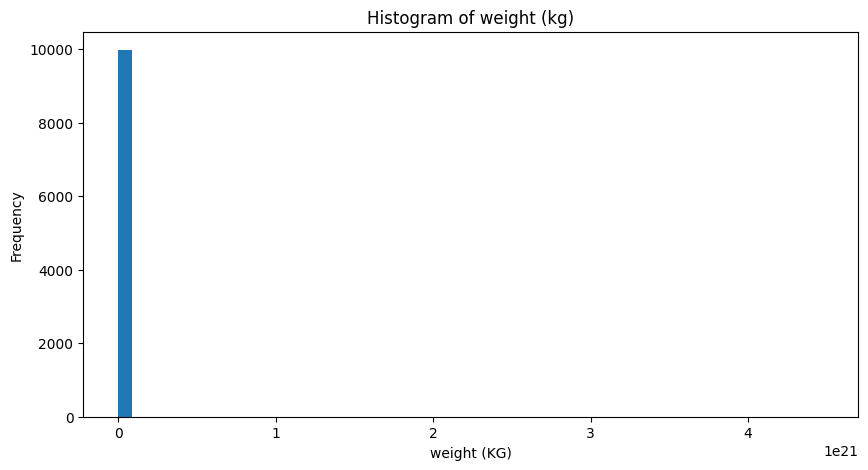

In [20]:
plt.figure(figsize = (10,5))
plt.hist(df['weight_in_kg'], bins = 50)
plt.title('Histogram of weight (kg)')
plt.xlabel('weight (KG)')
plt.ylabel('Frequency')
plt.show()

**Due to extreme outliers, the histogram's x-axis is stretched too much. 
Hence the other normal values become compressed on one edge.
We can zoom in to view the data better.**

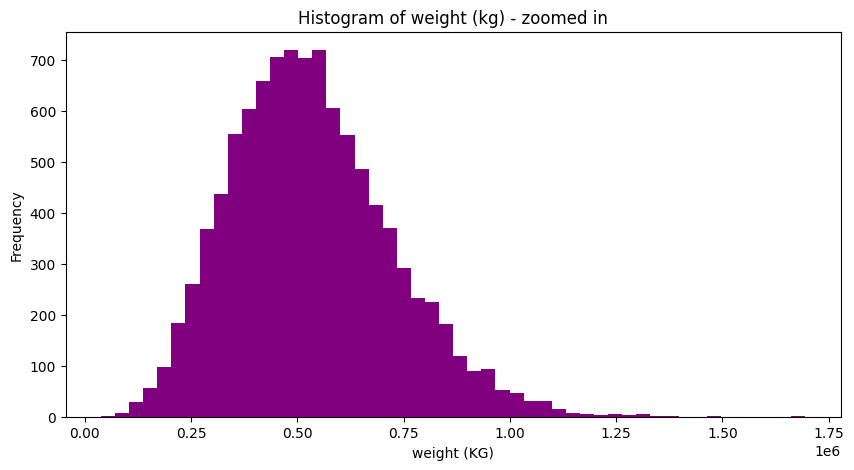

In [21]:
# visualizing it with a zoom-in on non-outlying values

df_filter_outliers = df[df['weight_in_kg'] < 1e7]

plt.figure(figsize = (10,5))
plt.hist(df_filter_outliers.weight_in_kg, bins = 50, color = 'purple')
plt.title('Histogram of weight (kg) - zoomed in')
plt.xlabel('weight (KG)')
plt.ylabel('Frequency')
plt.show()

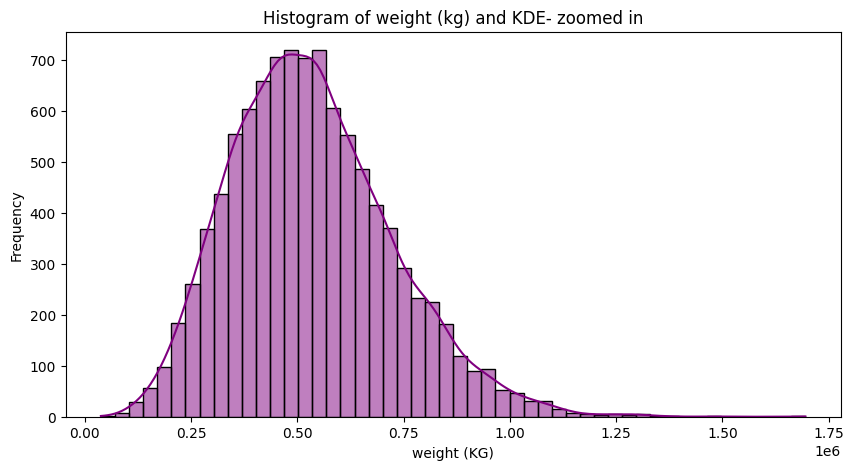

In [22]:
# visualizing it with a zoom-in on non-outlying values

df_filter_outliers = df[df['weight_in_kg'] < 1e7]

plt.figure(figsize = (10,5))
sns.histplot(df_filter_outliers.weight_in_kg, bins = 50, color = 'purple', kde = True)
plt.title('Histogram of weight (kg) and KDE- zoomed in')
plt.xlabel('weight (KG)')
plt.ylabel('Frequency')
plt.show()

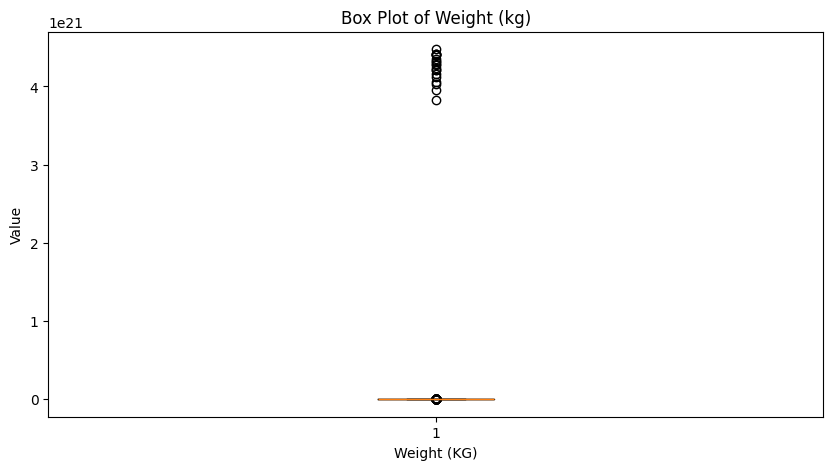

In [23]:
plt.figure(figsize = (10,5))
plt.boxplot(df['weight_in_kg'])
plt.title('Box Plot of Weight (kg)')
plt.xlabel('Weight (KG)')
plt.ylabel('Value')
plt.show()

**In the above plot, most of the values are very small (as compared to the outliers). A few extreme values (with the exponent e21) cause the y-axis to stretch outt too much so that the normal values are not seen clearly in the box and whisker plot. We can use the same filter as before to zoom in on the normal values.**

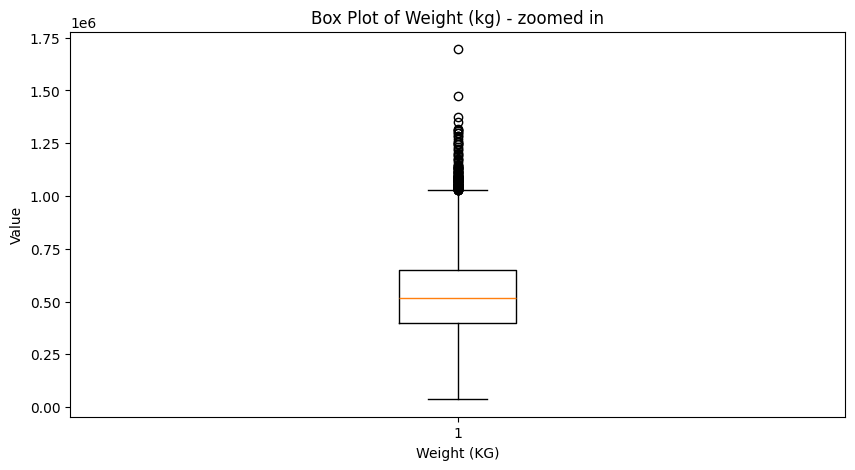

In [24]:
plt.figure(figsize = (10,5))
plt.boxplot(df_filter_outliers.weight_in_kg)
plt.title('Box Plot of Weight (kg) - zoomed in')
plt.xlabel('Weight (KG)')
plt.ylabel('Value')
plt.show()

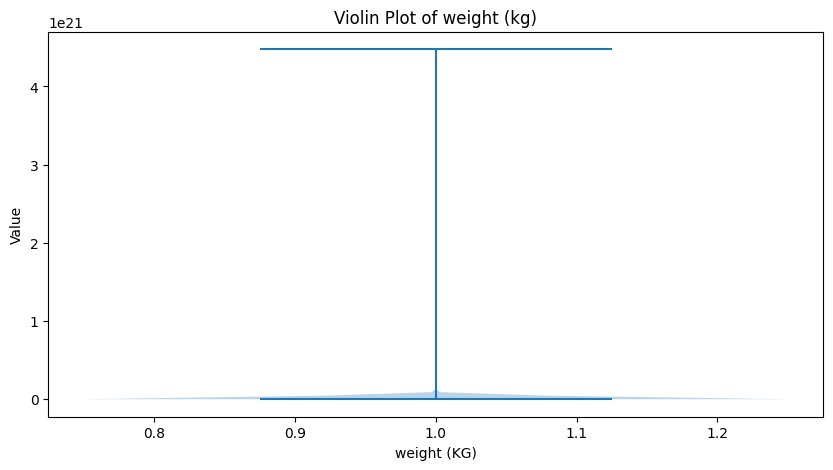

In [25]:
plt.figure(figsize = (10,5))
plt.violinplot(df.weight_in_kg)
plt.title('Violin Plot of weight (kg)')
plt.xlabel('weight (KG)')
plt.ylabel('Value')
plt.show()

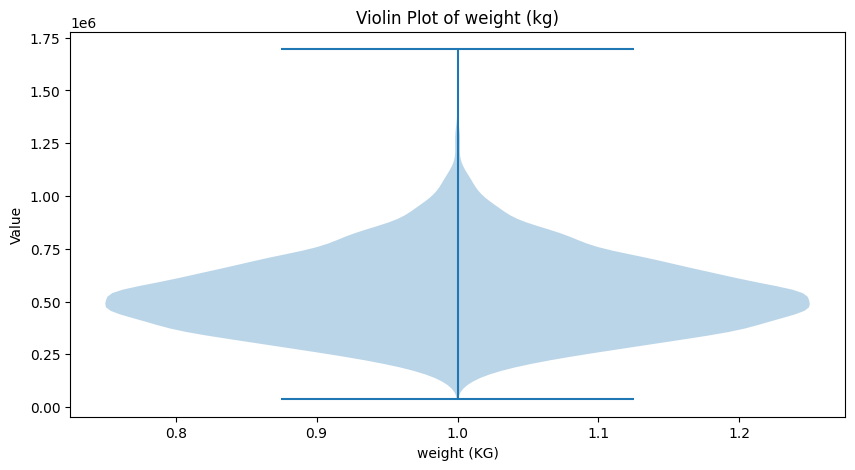

In [26]:
plt.figure(figsize = (10,5))
plt.violinplot(df_filter_outliers.weight_in_kg)
plt.title('Violin Plot of weight (kg)')
plt.xlabel('weight (KG)')
plt.ylabel('Value')
plt.show()

## Outlier Detection and removal

### considering any values outside 5 deviations to be outliers (5 * sigma)

**NOTE: The threshold of 5σ is still very high and using z-score may not be the best way (the mean and std would be very heavily influenced by the extreme outliers), but since the outliers are much much larger in this case, it is sufficient to detect most of the outliers.**

- A better way to detect the outliers would be to calculate an upper bound using the 75th percentile and interquartile range (IQR).
- Upper Bound = Q3 (75th percentile) + (1.5 * IQR)

In [27]:
df_updated = df.copy()

In [28]:
mean = df['weight_in_kg'].mean()
std = df['weight_in_kg'].std()

df_updated['z_score'] = (df['weight_in_kg'] - mean) / std

# considering any values outside 5 deviations to be outliers

In [29]:
df_updated
# dataframe with z-scores

,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multidimensionality,roughness,gear,rotation_speed,z_score
configuration_log_ID,,,,,,,,,,,,,,,,,,,,
1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898,no,NaN,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181,2,122.121415,-0.044728
2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849,no,NaN,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858,1,111.977476,-0.044728
3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,599570.696236,no,NaN,98.472489,683.459298,51.967423,115.995772,2716.279965,no,138.439571,1,137.268544,-0.044728
4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,649889.744140,no,NaN,97.107023,699.626001,47.626823,121.383895,2694.883523,no,125.939831,2,125.719071,-0.044728
5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,605444.403997,no,NaN,92.994235,650.253900,47.420237,118.633440,2885.260257,no,135.123613,1,134.710713,-0.044728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,98.693482,43.223126,B,IV,95.557115,1074.422817,103.228564,421022.149401,no,NaN,95.096684,644.767999,49.621868,97.779998,2868.383993,no,129.190408,1,130.355163,-0.044728
9997,80.361968,42.414173,C,IV,105.874139,922.783752,100.698130,273921.656401,no,NaN,92.894512,745.767938,50.972047,79.091321,2798.138494,no,123.402367,1,122.937046,-0.044728
9998,104.020139,43.071501,B,II,96.444678,1080.351218,101.673757,466053.196545,yes,severe,95.870445,670.006114,48.441531,104.778601,2854.847092,no,134.118454,1,131.985706,-0.044728


In [30]:
outliers = df_updated[df_updated['z_score'] > 5]
print(outliers[['weight_in_kg','z_score']])

                      weight_in_kg    z_score
configuration_log_ID                         
907                   4.292045e+21  22.571164
1006                  4.211469e+21  22.146584
2443                  4.346901e+21  22.860212
2916                  4.416201e+21  23.225373
3272                  4.036328e+21  21.223725
4092                  4.060261e+21  21.349832
4098                  4.405670e+21  23.169879
4342                  4.210067e+21  22.139197
4678                  4.397817e+21  23.128502
6062                  4.164309e+21  21.898090
6350                  4.119947e+21  21.664332
6743                  4.475432e+21  23.537473
6997                  4.230577e+21  22.247271
7291                  4.307065e+21  22.650306
7671                  4.267981e+21  22.444363
7777                  4.417280e+21  23.231055
7933                  3.831084e+21  20.142237
8853                  4.415957e+21  23.224086
9042                  3.948336e+21  20.760068
9765                  4.330235e+21

In [31]:
print(outliers.count())

width                  20
height                 20
ionizationclass        20
FluxCompensation       20
pressure               20
karma                  20
modulation             20
weight_in_kg           20
error                  20
error_type              3
Quality                20
reflectionScore        20
distortion             20
nicesness              20
smartness              20
multidimensionality    20
roughness              20
gear                   20
rotation_speed         20
z_score                20
dtype: int64


In [32]:
outlier_config_log_ids = outliers.index

In [33]:
outlier_config_log_ids

Index([ 907, 1006, 2443, 2916, 3272, 4092, 4098, 4342, 4678, 6062, 6350, 6743,
       6997, 7291, 7671, 7777, 7933, 8853, 9042, 9765],
      dtype='int64', name='configuration_log_ID')

In [34]:
df_clean = df_updated.drop(index = outlier_config_log_ids)

In [35]:
df_clean

,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multidimensionality,roughness,gear,rotation_speed,z_score
configuration_log_ID,,,,,,,,,,,,,,,,,,,,
1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898,no,NaN,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181,2,122.121415,-0.044728
2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849,no,NaN,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858,1,111.977476,-0.044728
3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,599570.696236,no,NaN,98.472489,683.459298,51.967423,115.995772,2716.279965,no,138.439571,1,137.268544,-0.044728
4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,649889.744140,no,NaN,97.107023,699.626001,47.626823,121.383895,2694.883523,no,125.939831,2,125.719071,-0.044728
5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,605444.403997,no,NaN,92.994235,650.253900,47.420237,118.633440,2885.260257,no,135.123613,1,134.710713,-0.044728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,98.693482,43.223126,B,IV,95.557115,1074.422817,103.228564,421022.149401,no,NaN,95.096684,644.767999,49.621868,97.779998,2868.383993,no,129.190408,1,130.355163,-0.044728
9997,80.361968,42.414173,C,IV,105.874139,922.783752,100.698130,273921.656401,no,NaN,92.894512,745.767938,50.972047,79.091321,2798.138494,no,123.402367,1,122.937046,-0.044728
9998,104.020139,43.071501,B,II,96.444678,1080.351218,101.673757,466053.196545,yes,severe,95.870445,670.006114,48.441531,104.778601,2854.847092,no,134.118454,1,131.985706,-0.044728


In [36]:
df_clean.loc[outlier_config_log_ids]  # should return empty
# confirm they are removed

KeyError: "None of [Index([ 907, 1006, 2443, 2916, 3272, 4092, 4098, 4342, 4678, 6062, 6350, 6743,\n       6997, 7291, 7671, 7777, 7933, 8853, 9042, 9765],\n      dtype='int64', name='configuration_log_ID')] are in the [index]"

In [37]:
df_clean.drop(columns = ['z_score'], inplace = True)

In [38]:
df_clean

,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multidimensionality,roughness,gear,rotation_speed
configuration_log_ID,,,,,,,,,,,,,,,,,,,
1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898,no,NaN,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181,2,122.121415
2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849,no,NaN,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858,1,111.977476
3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,599570.696236,no,NaN,98.472489,683.459298,51.967423,115.995772,2716.279965,no,138.439571,1,137.268544
4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,649889.744140,no,NaN,97.107023,699.626001,47.626823,121.383895,2694.883523,no,125.939831,2,125.719071
5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,605444.403997,no,NaN,92.994235,650.253900,47.420237,118.633440,2885.260257,no,135.123613,1,134.710713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,98.693482,43.223126,B,IV,95.557115,1074.422817,103.228564,421022.149401,no,NaN,95.096684,644.767999,49.621868,97.779998,2868.383993,no,129.190408,1,130.355163
9997,80.361968,42.414173,C,IV,105.874139,922.783752,100.698130,273921.656401,no,NaN,92.894512,745.767938,50.972047,79.091321,2798.138494,no,123.402367,1,122.937046
9998,104.020139,43.071501,B,II,96.444678,1080.351218,101.673757,466053.196545,yes,severe,95.870445,670.006114,48.441531,104.778601,2854.847092,no,134.118454,1,131.985706


<hr>

## EDA and Visualization of cleaned data

In [39]:
print(df_clean['weight_in_kg'].describe())
print()
print(df_clean['weight_in_kg'].median())

count    9.980000e+03
mean     5.330337e+05
std      1.895425e+05
min      3.768185e+04
25%      3.963996e+05
50%      5.171812e+05
75%      6.492830e+05
max      1.695184e+06
Name: weight_in_kg, dtype: float64

517181.1682388865


**Now the values, such as std and mean and maximum value seem much more reasonable and closer to other values in the dataset**

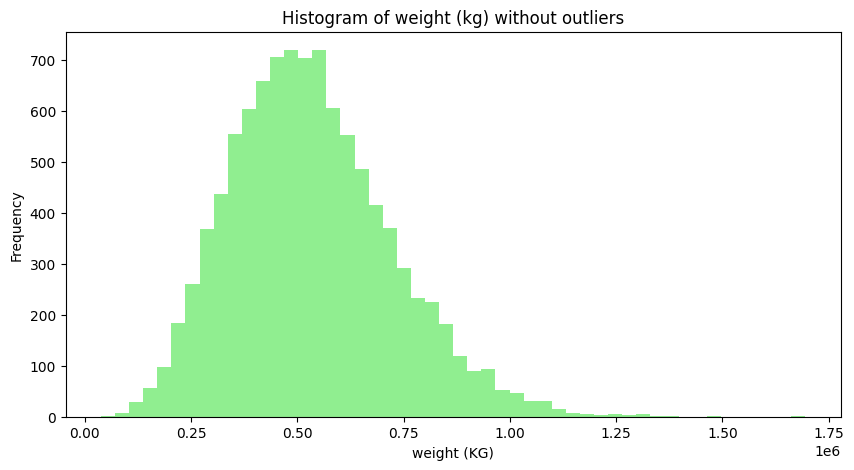

In [40]:
plt.figure(figsize = (10,5))
plt.hist(df_clean['weight_in_kg'], bins = 50, color = 'lightgreen')
plt.title('Histogram of weight (kg) without outliers')
plt.xlabel('weight (KG)')
plt.ylabel('Frequency')
plt.show()

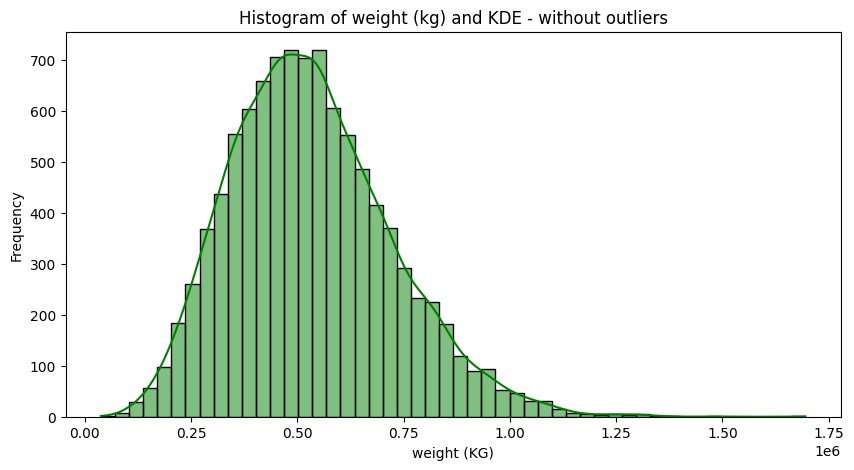

In [41]:
plt.figure(figsize = (10,5))
sns.histplot(df_clean['weight_in_kg'], bins = 50, color = 'green', kde = True)
plt.title('Histogram of weight (kg) and KDE - without outliers')
plt.xlabel('weight (KG)')
plt.ylabel('Frequency')
plt.show()

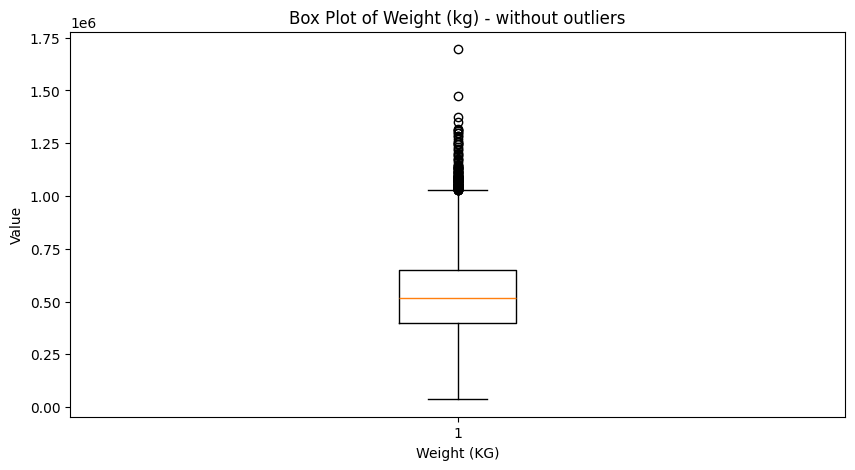

In [42]:
plt.figure(figsize = (10,5))
plt.boxplot(df_clean.weight_in_kg)
plt.title('Box Plot of Weight (kg) - without outliers')
plt.xlabel('Weight (KG)')
plt.ylabel('Value')
plt.show()

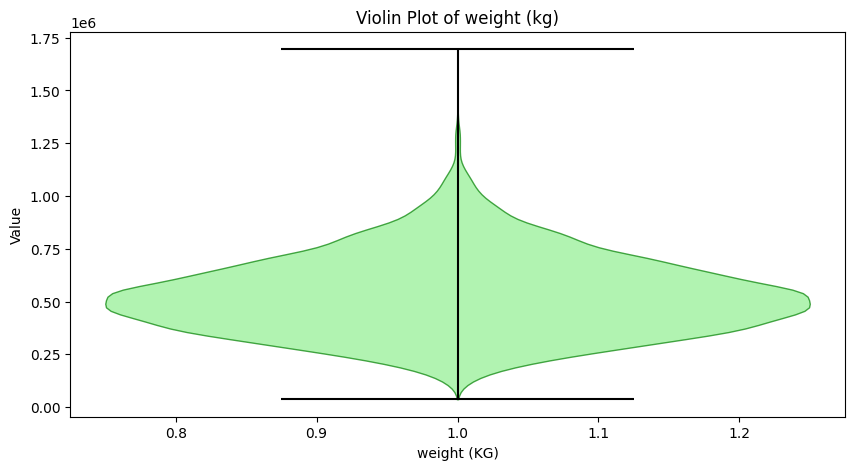

In [43]:
plt.figure(figsize = (10,5))
vp = plt.violinplot(df_filter_outliers.weight_in_kg)

# vp['bodies'] is list of violin shapes you can loop throug
for body in vp['bodies']:
    body.set_facecolor('lightgreen')   # fill color
    body.set_edgecolor('green')    # outline color
    body.set_alpha(0.7)                # transparency

vp['cbars'].set_color('black')        # central bar
vp['cmins'].set_color('black')          # min line
vp['cmaxes'].set_color('black')        # max line

plt.title('Violin Plot of weight (kg)')
plt.xlabel('weight (KG)')
plt.ylabel('Value')
plt.show()

<hr>

## Feature Analysis & Selection

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 1 to 10000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   width                9980 non-null   float64
 1   height               9980 non-null   float64
 2   ionizationclass      9980 non-null   object 
 3   FluxCompensation     9980 non-null   object 
 4   pressure             9980 non-null   float64
 5   karma                9980 non-null   float64
 6   modulation           9980 non-null   float64
 7   weight_in_kg         9980 non-null   float64
 8   error                9980 non-null   object 
 9   error_type           3362 non-null   object 
 10  Quality              9980 non-null   float64
 11  reflectionScore      9980 non-null   float64
 12  distortion           9980 non-null   float64
 13  nicesness            9980 non-null   float64
 14  smartness            9980 non-null   float64
 15  multidimensionality  9980 non-null   objec

In [45]:
numeric_cols = df_clean.select_dtypes(include = 'number').columns

In [46]:
numeric_cols

Index(['width', 'height', 'pressure', 'karma', 'modulation', 'weight_in_kg',
       'Quality', 'reflectionScore', 'distortion', 'nicesness', 'smartness',
       'roughness', 'gear', 'rotation_speed'],
      dtype='object')

In [47]:
len(numeric_cols)
# note: this also includes the target variable itself

14

In [48]:
group1 = numeric_cols[:6]
group2 = numeric_cols[6:12]
group3 = numeric_cols[12:]

# grouping numeric columns

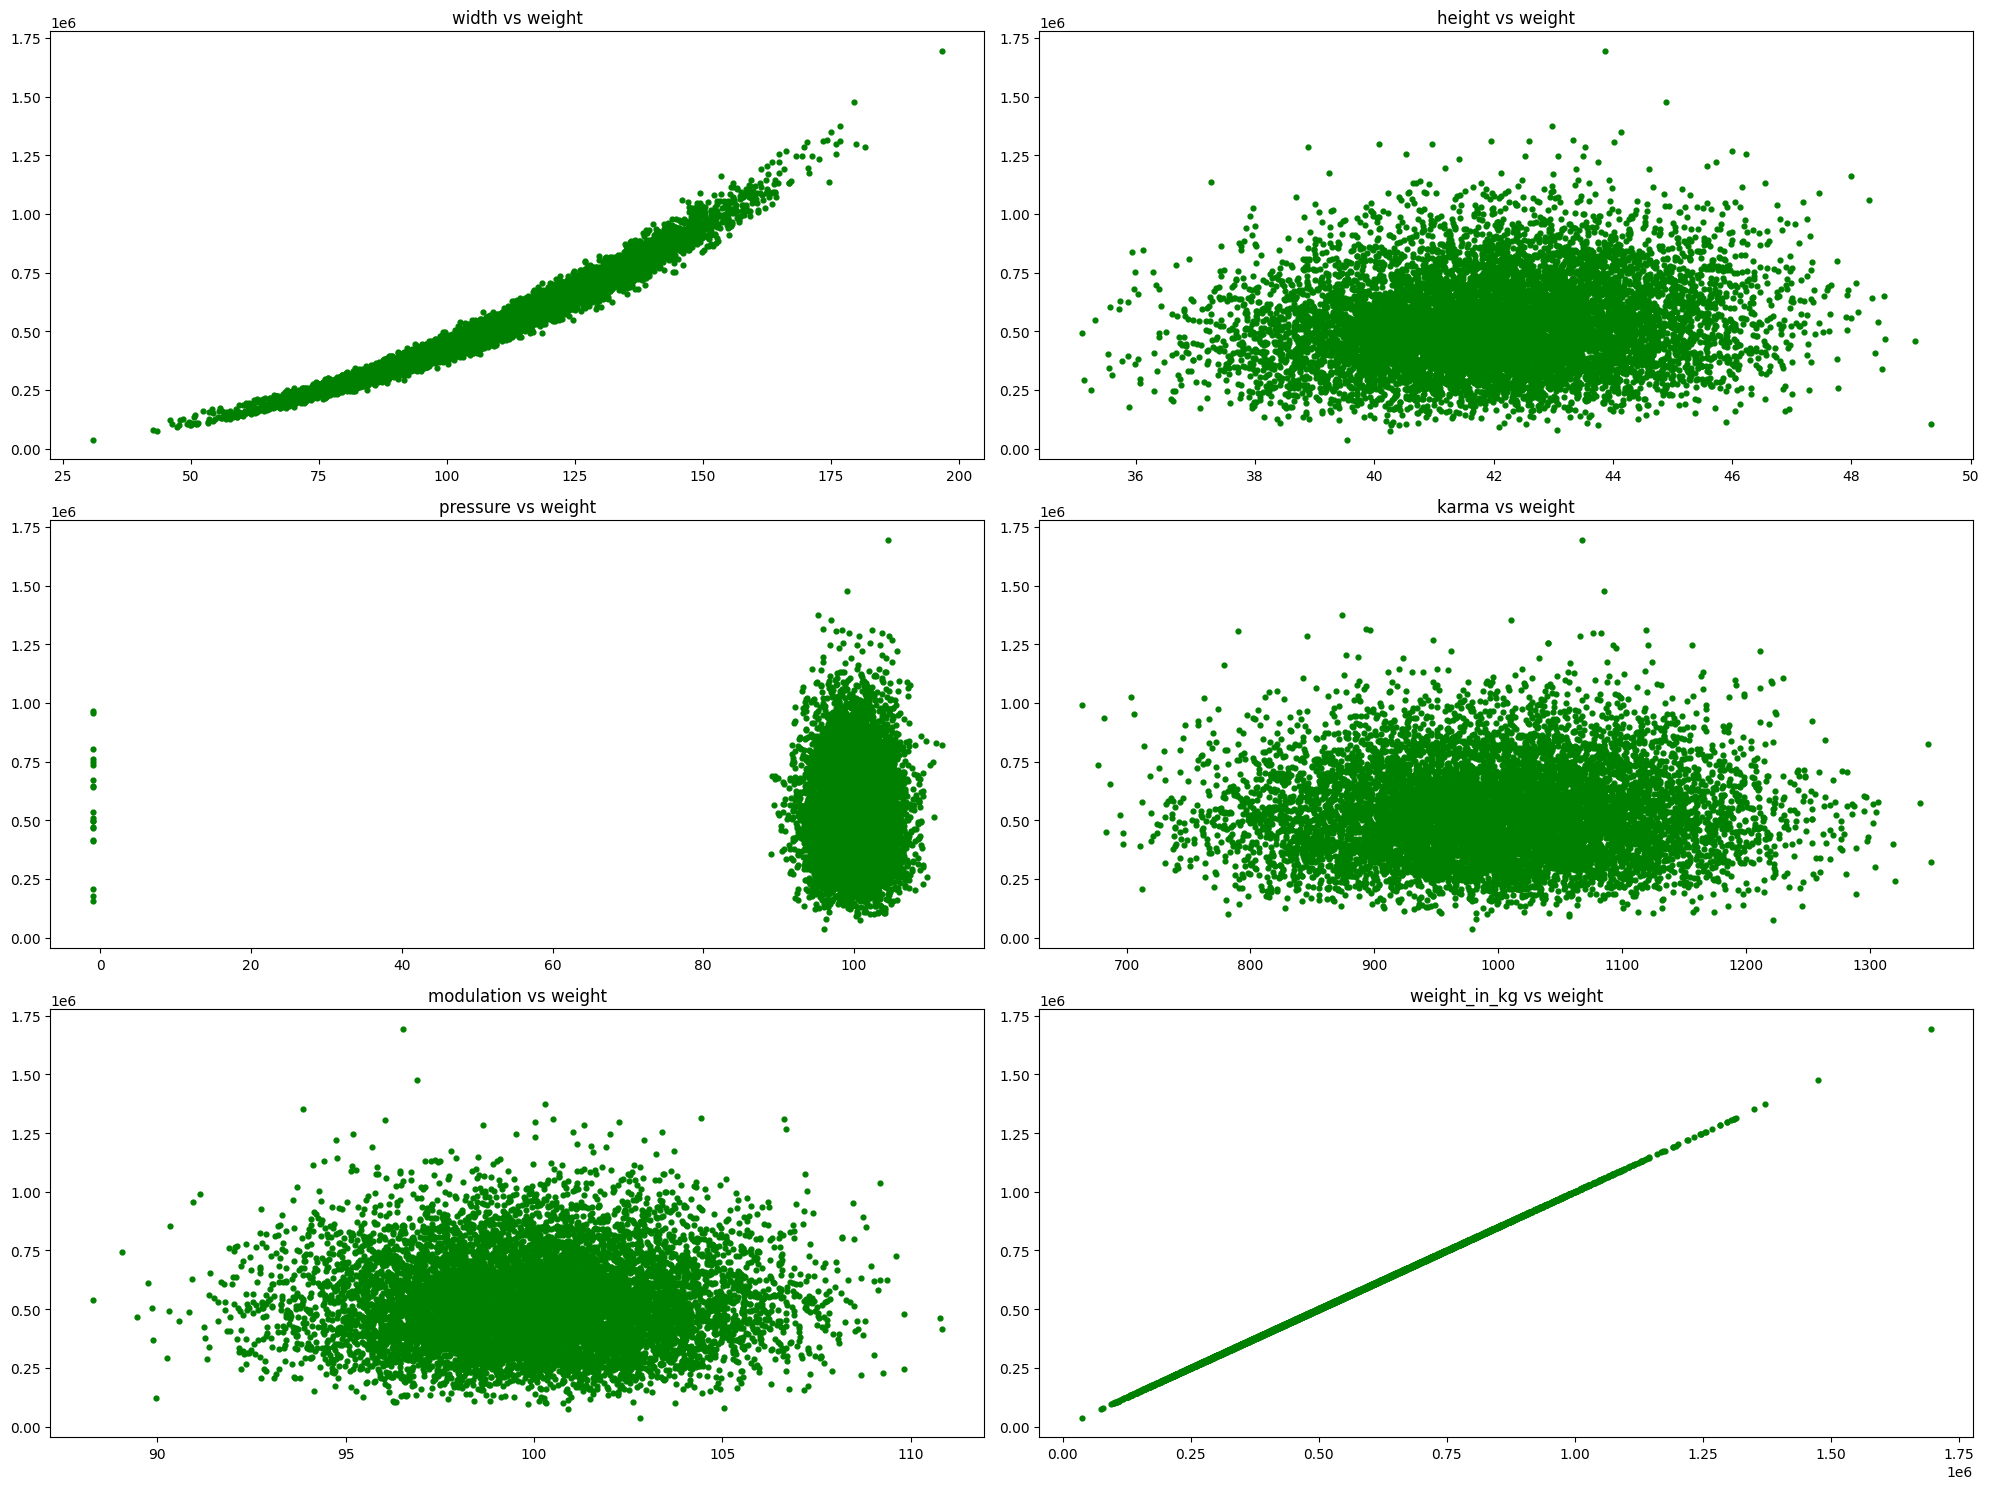

In [49]:
# FIGURE 1 - first 6 numeric columns

plt.figure(figsize = (20,15))

for i, col in enumerate(group1, 1):    
    # Loop through the list AND give a counter that starts at 1; i (1,2,3,4,5,6) for subplot placement
    # col (the column name) for the actual scatterplot
    
    plt.subplot(3,2,i)             # num of rows, num of columns, which box the subplot belongs to
    plt.scatter(df_clean[col], df_clean['weight_in_kg'], s = 12, color = 'green')
    plt.title(f'{col} vs weight')

plt.tight_layout()
plt.show()

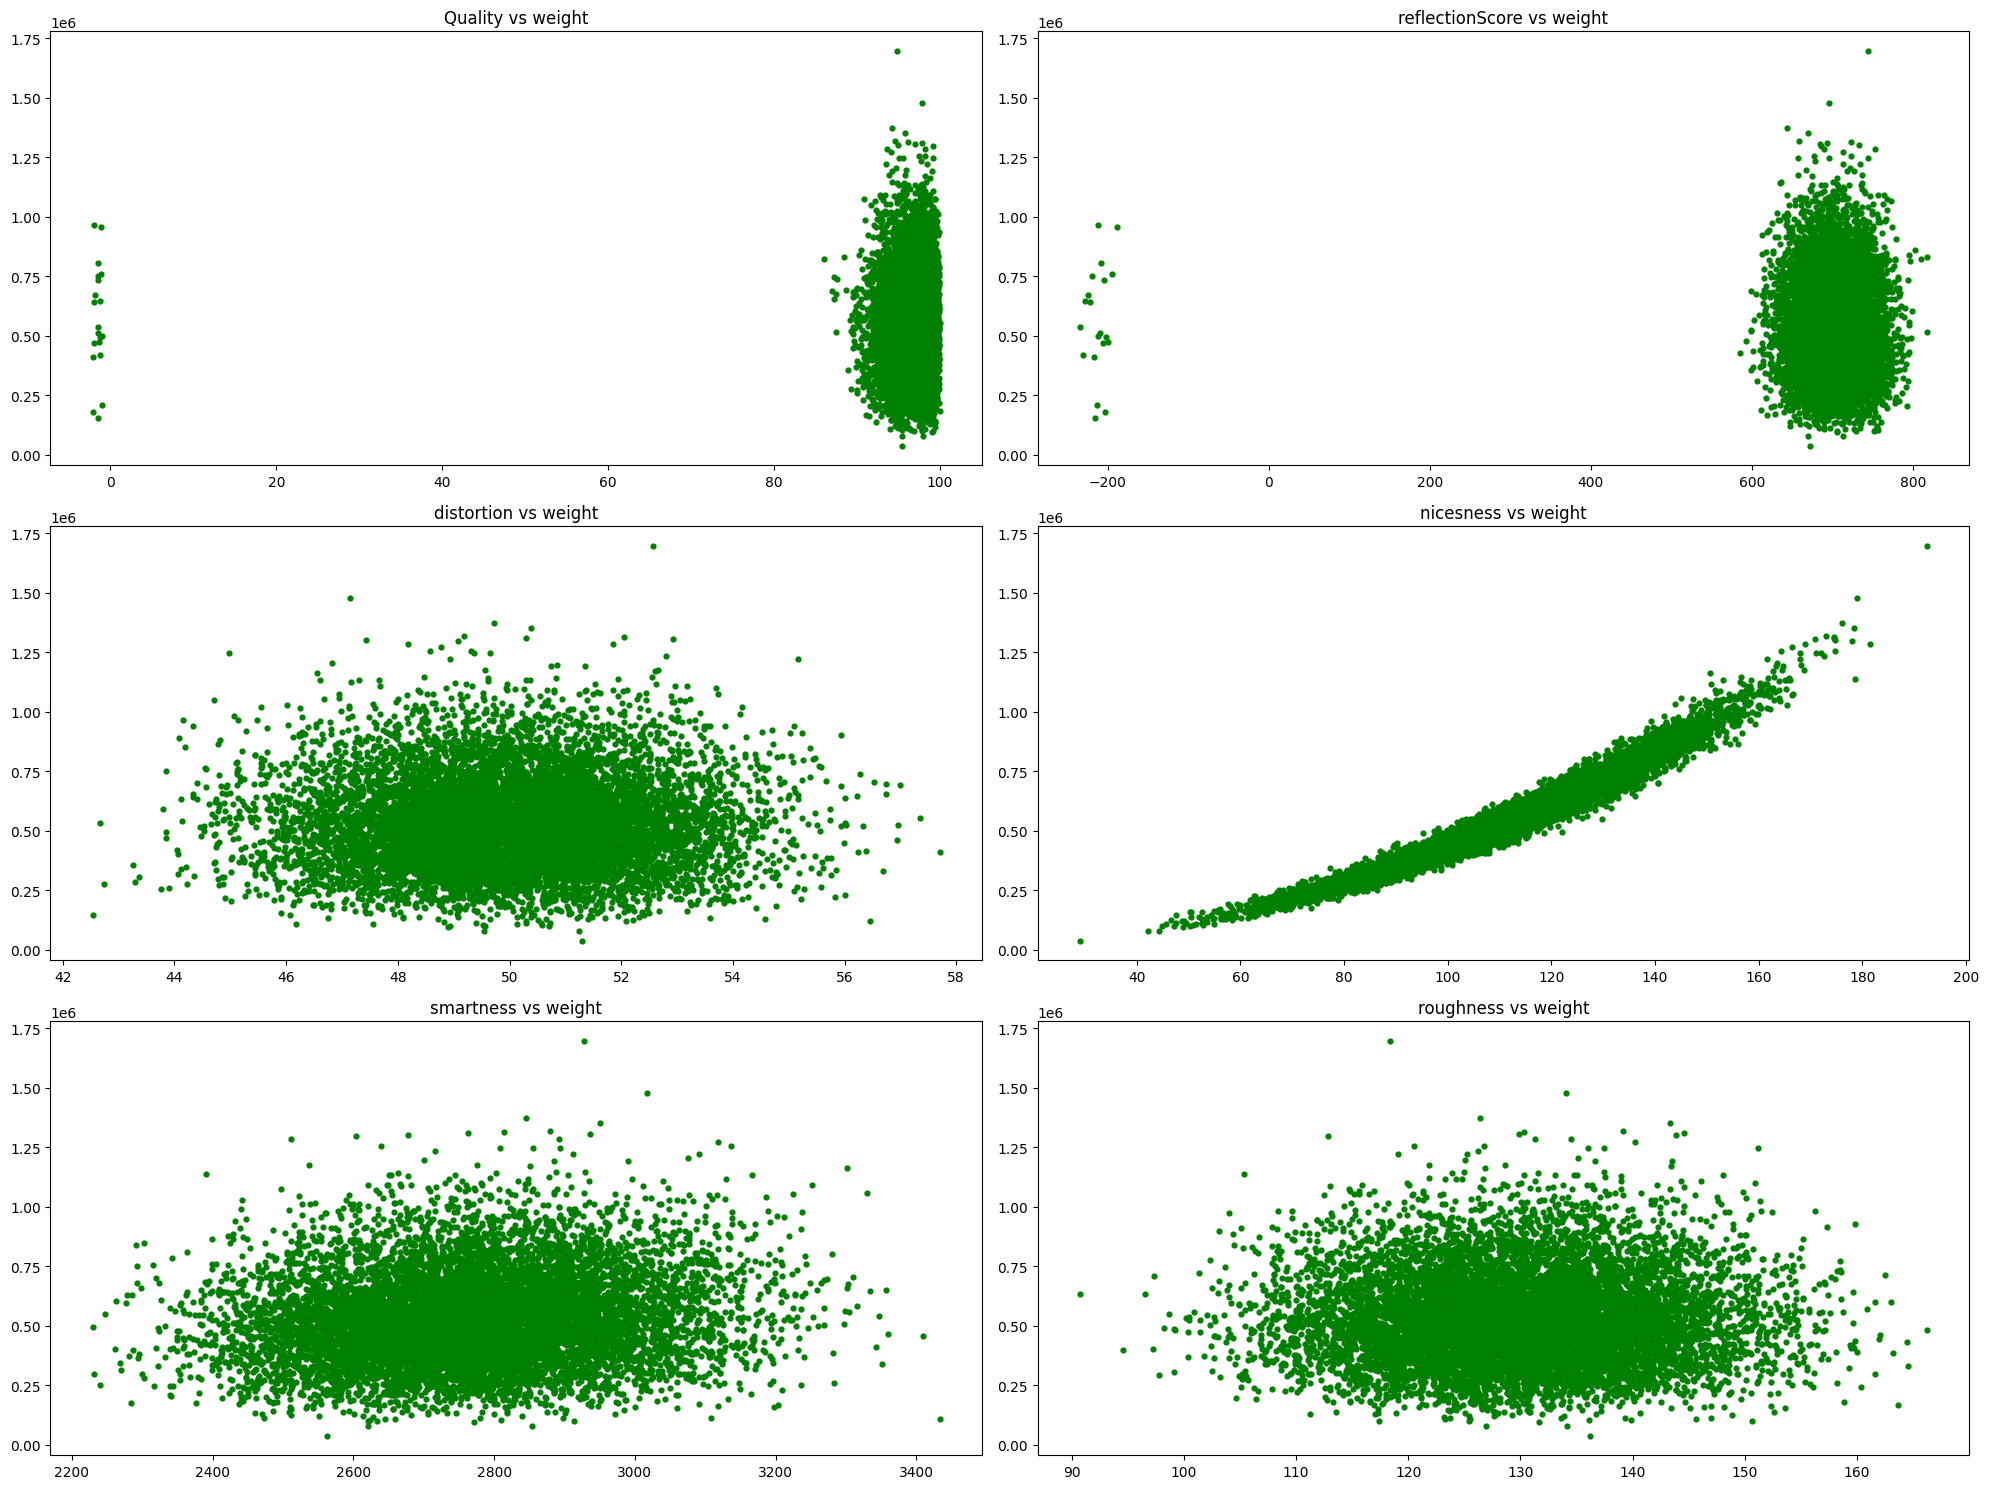

In [50]:
# FIGURE 2 - next 6 columns

plt.figure(figsize = (20,15))

for i, col in enumerate(group2, 1):
    plt.subplot(3,2,i)
    plt.scatter(df_clean[col], df_clean['weight_in_kg'], s = 12, color = 'green')
    plt.title(f'{col} vs weight')

plt.tight_layout()
plt.show()

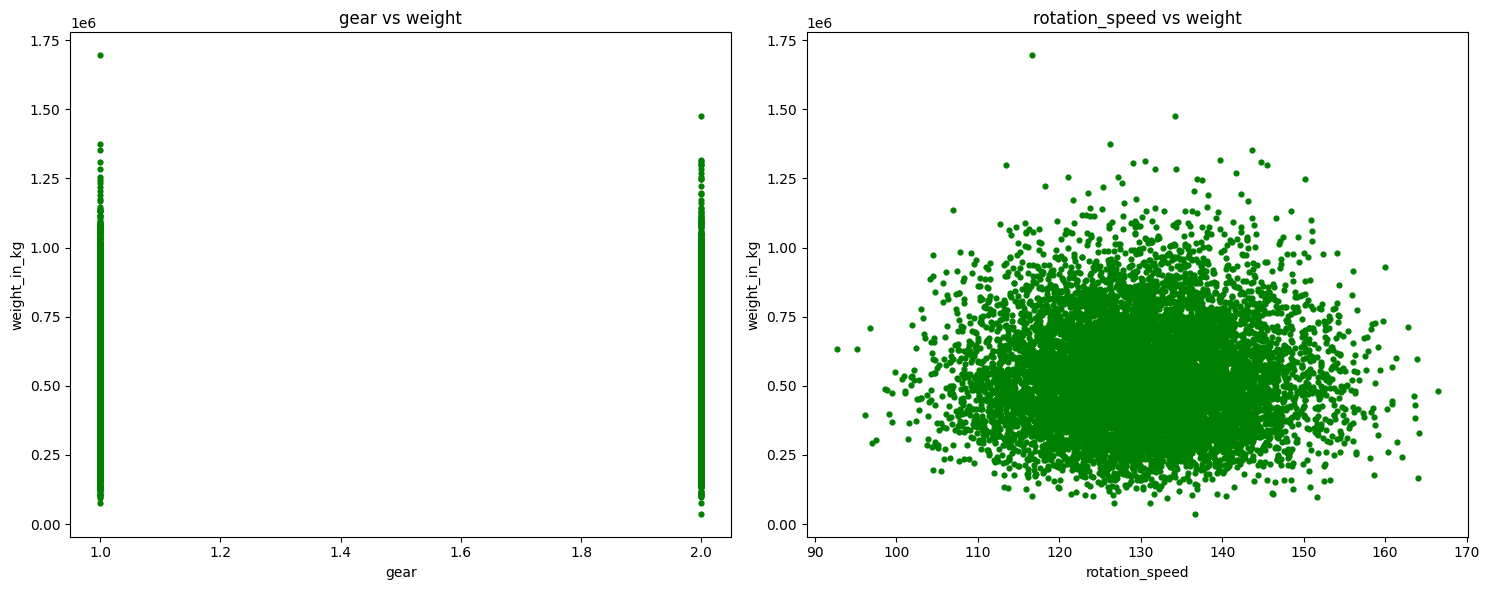

In [51]:
# FIGURE 3- remaining 2 columns

plt.figure(figsize=(15, 6))

for i, col in enumerate(group3, 1):
    plt.subplot(1, 2, i)  
    plt.scatter(df_clean[col], df_clean['weight_in_kg'], s=12, color = 'green')
    plt.title(f'{col} vs weight')
    plt.xlabel(col)
    plt.ylabel('weight_in_kg')

plt.tight_layout()
plt.show()


**Real Continuos Numeric Features**:
1. width - very strong positive correlation with target variable
2. height
3. modulation
4. roughness
5. distortion
6. smartness
7. roation_speed - almost no correlation
8. pressure
9. karma
10. Quality
11. reflectionScore

**Seem to be categorical features**:
1. gear

**Continuous numeric but can not be used:**
1. niceness

- (we usually would know this value only AFTER manufacturing the product, so it should not be used to predict the weight of product BEFORE production

    **Data Leakage :**
    - If a feature (like nicesness in this case) is determined during or after the target variable (weight_in_kg) is finalized, using it to predict the weight means training the model on information it will not have in a real-world prediction scenario. This is called data leakage.

In [52]:
correlation_matrix = df_clean.loc[:, numeric_cols].corr()

In [53]:
print(correlation_matrix)

                    width    height  pressure     karma  modulation  \
width            1.000000 -0.006551 -0.007707  0.014000    0.007288   
height          -0.006551  1.000000 -0.011650 -0.006416   -0.010034   
pressure        -0.007707 -0.011650  1.000000  0.006511    0.014047   
karma            0.014000 -0.006416  0.006511  1.000000    0.000334   
modulation       0.007288 -0.010034  0.014047  0.000334    1.000000   
weight_in_kg     0.979350  0.124248 -0.010971  0.013690    0.006011   
Quality         -0.004759 -0.004583  0.768103  0.008955    0.006473   
reflectionScore -0.011075 -0.014549  0.965783  0.003314    0.013193   
distortion       0.007042  0.004800  0.010763  0.004380    0.008628   
nicesness        0.995219 -0.006814 -0.007167  0.013850    0.005862   
smartness       -0.006542  0.999367 -0.011334 -0.006246   -0.009649   
roughness        0.000615  0.007661  0.002799  0.000144    0.005052   
gear            -0.007156 -0.001055 -0.003024 -0.011217    0.014398   
rotati

In [54]:
correlation_weight_only = df_clean.loc[:, numeric_cols].corr()['weight_in_kg']

In [55]:
correlation_weight_only

width              0.979350
height             0.124248
pressure          -0.010971
karma              0.013690
modulation         0.006011
weight_in_kg       1.000000
Quality           -0.009281
reflectionScore   -0.014221
distortion         0.007601
nicesness          0.974587
smartness          0.124197
roughness          0.003641
gear              -0.006837
rotation_speed     0.002283
Name: weight_in_kg, dtype: float64

In [56]:
correlation_weight_only.sort_values(ascending = False)

weight_in_kg       1.000000
width              0.979350
nicesness          0.974587
height             0.124248
smartness          0.124197
karma              0.013690
distortion         0.007601
modulation         0.006011
roughness          0.003641
rotation_speed     0.002283
gear              -0.006837
Quality           -0.009281
pressure          -0.010971
reflectionScore   -0.014221
Name: weight_in_kg, dtype: float64

**The above output shows that width and niceness have the strongest positive correlation with weight_in_kg, and the highest correlation with it in general.**

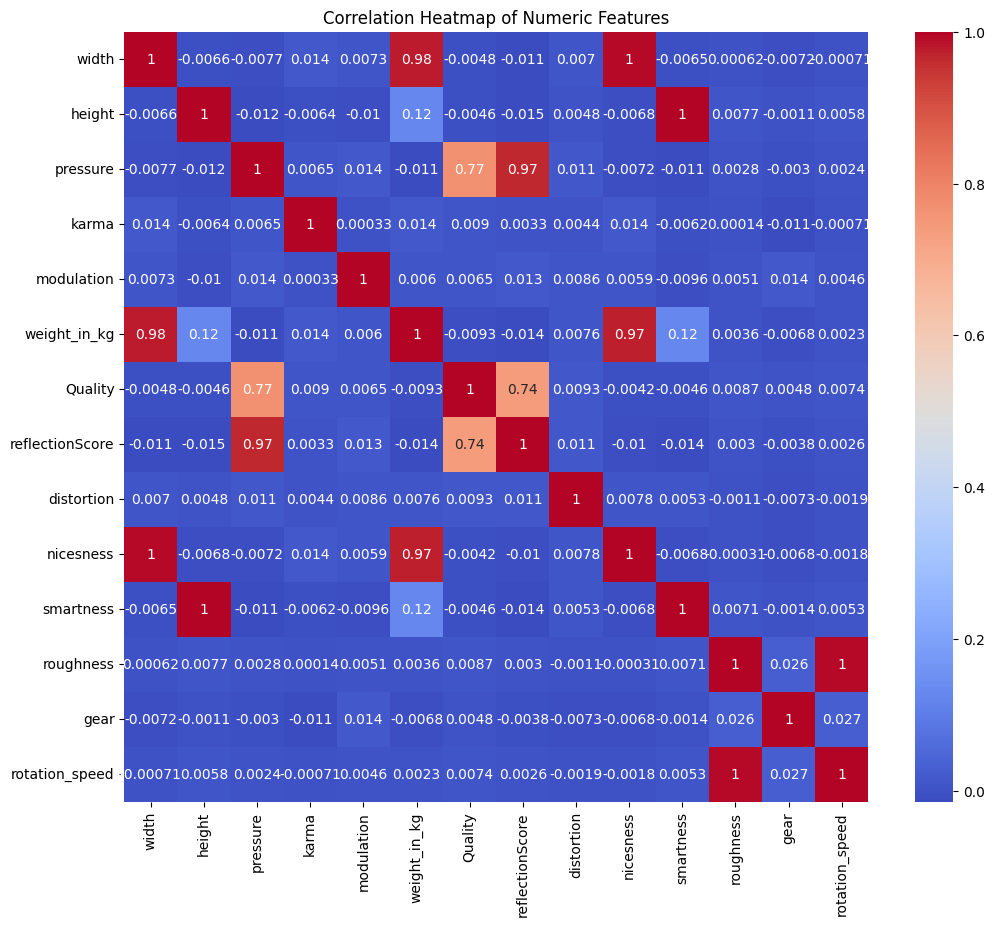

In [57]:
# Correlation heatmap

plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

**Based on the Analysis above, I will use the following numeric features in training the model:**


width, height, modulation, roughness, distortion, smartness, karma, pressure, quality, and reflectionScore.

**The following is not used as a numeric feature, but instead as a categorical one:**

gear

**The following features will not be used:**

niceness - could lead to data leakage

rotation_speed - almost no correlation (insignificant)



- Although gear and rotation_speed are operational parameters, correlation analysis shows no meaningful linear relationship with weight. gear will be handled as a categorical feature (via one-hot encoding), while rotation_speed is excluded

**Categorical features (to be encoded):**

- ionizationclass
- FluxCompensation
- error
- error_type
- multideminsionality
- gear (categorical although stored as numeric)

**Numeric features used for modeling:**

- width
- height
- pressure
- karma
- modulation
- distortion
- smartness
- roughness
- Quality
- reflectionScore

**Dropped features:**

- niceness (leakage)
- rotation_speed (no correlation)

### Inspecting Categorical Features

In [58]:
categorical_cols = df_clean.select_dtypes(include = 'object').columns

In [59]:
print(categorical_cols)

Index(['ionizationclass', 'FluxCompensation', 'error', 'error_type',
       'multidimensionality'],
      dtype='object')


In [60]:
df_clean[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 1 to 10000
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ionizationclass      9980 non-null   object
 1   FluxCompensation     9980 non-null   object
 2   error                9980 non-null   object
 3   error_type           3362 non-null   object
 4   multidimensionality  9980 non-null   object
dtypes: object(5)
memory usage: 725.9+ KB


In [61]:
df_clean[['error', 'error_type']].head(20)

,error,error_type
configuration_log_ID,,
1,no,NaN
2,no,NaN
3,no,NaN
4,no,NaN
5,no,NaN
6,no,NaN
7,no,NaN
8,no,NaN
9,yes,severe


In [62]:
df_clean[ (df_clean.error == 'yes') & (df_clean.error_type.isna()) ]

,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multidimensionality,roughness,gear,rotation_speed
configuration_log_ID,,,,,,,,,,,,,,,,,,,


**No rows present where there exists an error and its error_type is undefined**
- So we can fill all rows with error = no and error_type = NaN with 'none'

In [63]:
df_clean.loc[ (df_clean.error == 'no') & (df_clean.error_type.isna()), 'error_type'] = 'none'

# fill NaN (missing values) with the string 'none'
# NOTE: don't use uppercase N in None; it's a python object

C:\Users\agrim\AppData\Local\Temp\ipykernel_38244\3150593646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_clean, x = col, y = 'weight_in_kg', palette = 'pastel', linewidth = 2)


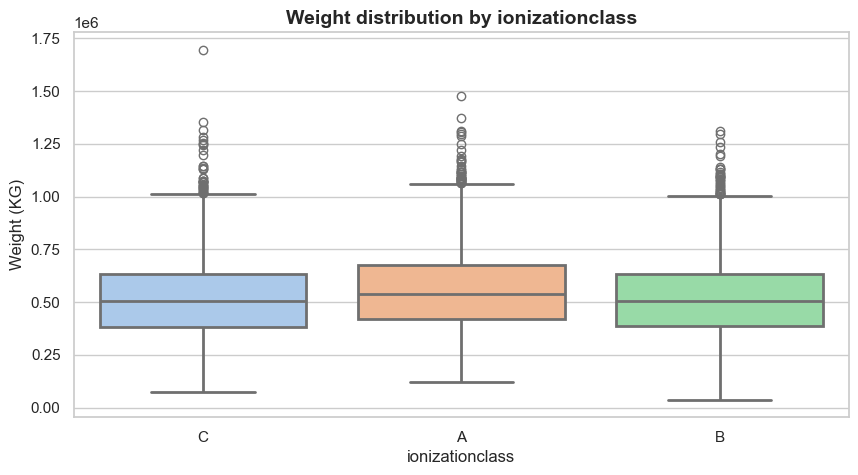

C:\Users\agrim\AppData\Local\Temp\ipykernel_38244\3150593646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_clean, x = col, y = 'weight_in_kg', palette = 'pastel', linewidth = 2)


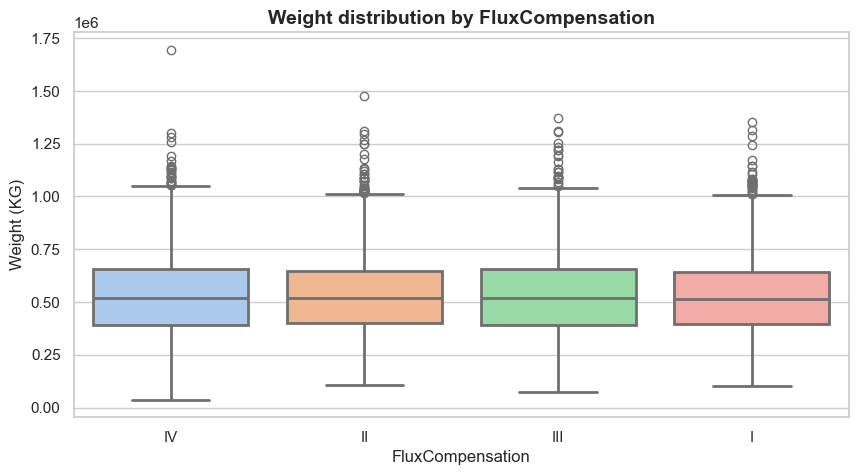

C:\Users\agrim\AppData\Local\Temp\ipykernel_38244\3150593646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_clean, x = col, y = 'weight_in_kg', palette = 'pastel', linewidth = 2)


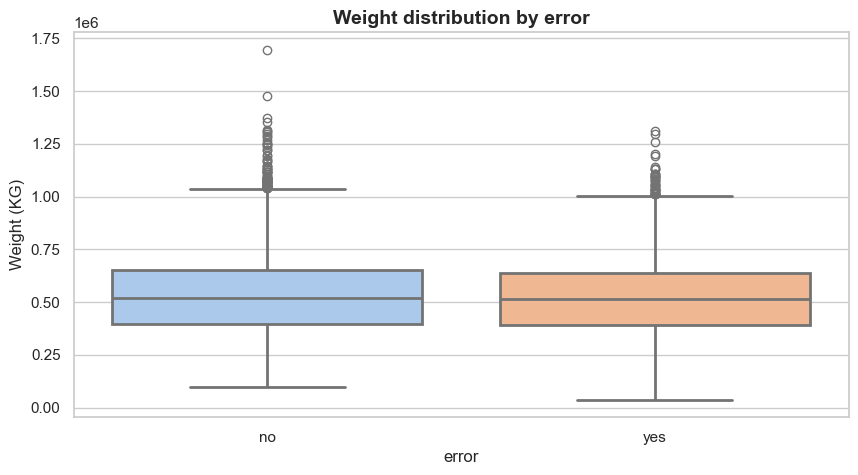

C:\Users\agrim\AppData\Local\Temp\ipykernel_38244\3150593646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_clean, x = col, y = 'weight_in_kg', palette = 'pastel', linewidth = 2)


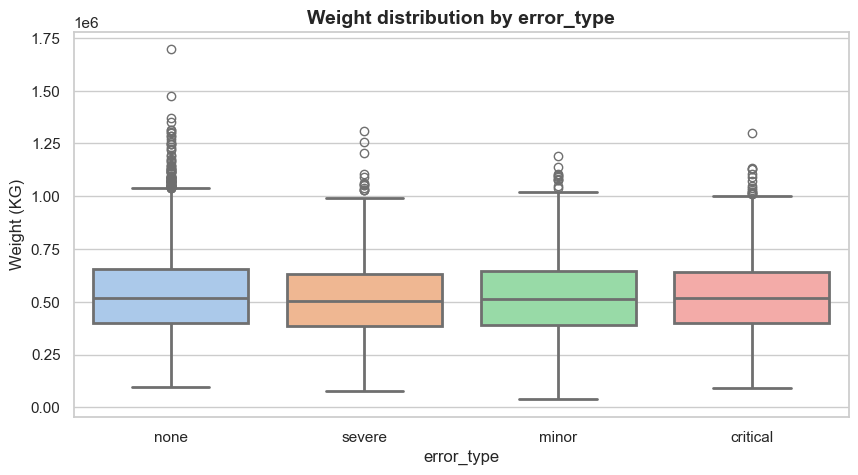

C:\Users\agrim\AppData\Local\Temp\ipykernel_38244\3150593646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_clean, x = col, y = 'weight_in_kg', palette = 'pastel', linewidth = 2)


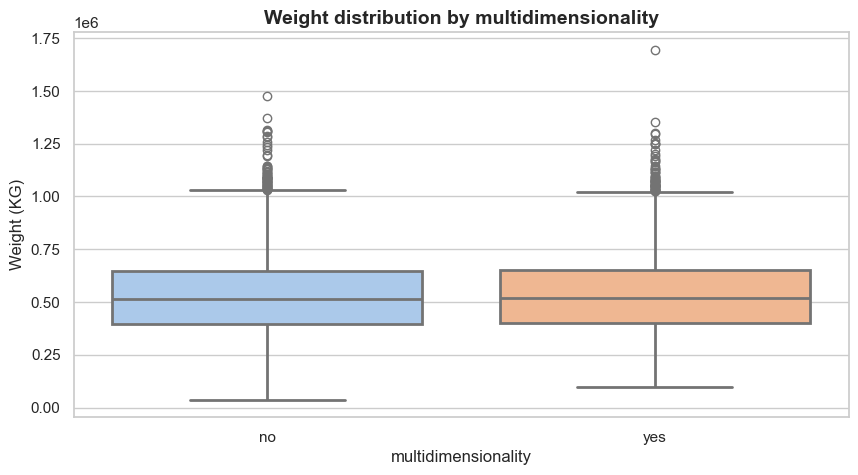

C:\Users\agrim\AppData\Local\Temp\ipykernel_38244\3150593646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_clean, x = col, y = 'weight_in_kg', palette = 'pastel', linewidth = 2)


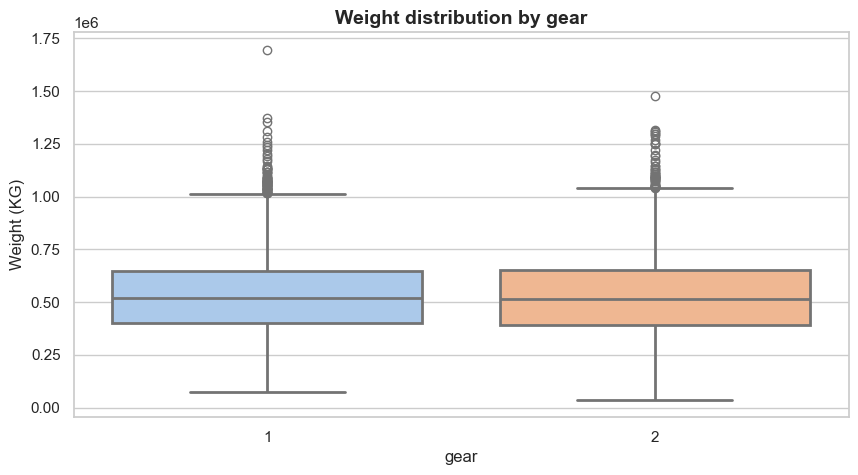

In [64]:
categorical_features = ['ionizationclass', 'FluxCompensation', 'error', 'error_type', 'multidimensionality', 'gear']
sns.set_theme(style = 'whitegrid')

for col in categorical_features:
    plt.figure(figsize = (10,5))
    sns.boxplot(data = df_clean, x = col, y = 'weight_in_kg', palette = 'pastel', linewidth = 2)
    plt.title(f'Weight distribution by {col}', fontsize = 14, fontweight = 'bold')
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Weight (KG)', fontsize = 12)
    plt.show()

#### Although the boxplots show that most categorical features do not produce strong differences in the median weight_in_kg, we  keep all of them. A Random Forest Regressor can capture non-linear relationships and interactions that may not be visible through simple visual inspection. Since including these features does not significantly increase model complexity, it is reasonable to retain them so the model has access to as much relevant information as possible.

### Final Features Selected

**Numerical Features**

1. width (the most important feature)
2. height
3. pressure
4. karma
5. modulation
6. distortion
7. smartness
8. roughness
9. quality
10. reflectionScore


**Categorical**

1. FluxCompensation
2. ionizationclass
3. error
4. error_type
5. multidimensionality
6. gear

<hr>

## Encoding Categorical Features

In [65]:
df_clean.head(10)

,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multidimensionality,roughness,gear,rotation_speed
configuration_log_ID,,,,,,,,,,,,,,,,,,,
1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898,no,none,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181,2,122.121415
2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849,no,none,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858,1,111.977476
3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,599570.696236,no,none,98.472489,683.459298,51.967423,115.995772,2716.279965,no,138.439571,1,137.268544
4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,649889.744140,no,none,97.107023,699.626001,47.626823,121.383895,2694.883523,no,125.939831,2,125.719071
5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,605444.403997,no,none,92.994235,650.253900,47.420237,118.633440,2885.260257,no,135.123613,1,134.710713
6,107.877510,38.754705,B,I,106.082179,1011.504626,104.460272,451021.016206,no,none,93.598700,730.302411,50.684984,112.678652,2503.038810,no,111.291785,2,113.064278
7,140.230440,43.543569,A,III,98.498426,1007.291462,98.240724,886277.707811,no,none,97.796838,688.212015,51.750620,136.692406,2896.899414,no,127.030662,1,127.285658
8,108.106819,39.424052,A,III,101.731098,906.123498,92.188762,490763.193519,no,none,97.330180,733.517459,49.610422,104.475123,2552.656337,no,109.167910,2,108.457688
9,150.368474,43.783152,B,II,104.159572,999.234359,96.793683,989975.895261,yes,severe,94.151741,766.192869,48.261987,151.463664,2915.271660,no,131.147078,2,131.158463


- ionizationclass, error, error_type, multidimensionality, and gear will be one-hot nominal-encoded.
- FluxCompensation will be ordinal encoded.

In [66]:
df_clean['FluxCompensation'].unique()

array(['IV', 'II', 'III', 'I'], dtype=object)

In [67]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
# Ordinal encoding

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories = [['I', 'II', 'III', 'IV']])

df_clean['FluxCompensation_encoded'] = encoder.fit_transform(df_clean[['FluxCompensation']])

### NOTE: Not setting drop_first = True when encoding is okay. RandomForestRegressor is generally robust to multicollinearity.

In [69]:
df_clean

,width,height,ionizationclass,FluxCompensation,pressure,karma,modulation,weight_in_kg,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multidimensionality,roughness,gear,rotation_speed,FluxCompensation_encoded
configuration_log_ID,,,,,,,,,,,,,,,,,,,,
1,137.419169,44.326218,C,IV,103.937207,976.538993,98.309438,837068.270898,no,none,95.489138,736.826681,49.666361,139.496837,2964.217002,no,123.202181,2,122.121415,3.0
2,98.706037,41.619531,A,II,101.177877,1031.806826,102.748068,435504.324849,no,none,98.262642,694.881024,52.826310,100.380138,2733.298369,yes,111.040858,1,111.977476,1.0
3,117.262568,41.421088,A,III,99.381956,840.246668,99.451354,599570.696236,no,none,98.472489,683.459298,51.967423,115.995772,2716.279965,no,138.439571,1,137.268544,2.0
4,122.657252,41.202308,A,I,101.833664,964.391122,101.022948,649889.744140,no,none,97.107023,699.626001,47.626823,121.383895,2694.883523,no,125.939831,2,125.719071,0.0
5,118.085366,43.418485,C,I,95.246304,859.331870,97.698503,605444.403997,no,none,92.994235,650.253900,47.420237,118.633440,2885.260257,no,135.123613,1,134.710713,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,98.693482,43.223126,B,IV,95.557115,1074.422817,103.228564,421022.149401,no,none,95.096684,644.767999,49.621868,97.779998,2868.383993,no,129.190408,1,130.355163,3.0
9997,80.361968,42.414173,C,IV,105.874139,922.783752,100.698130,273921.656401,no,none,92.894512,745.767938,50.972047,79.091321,2798.138494,no,123.402367,1,122.937046,3.0
9998,104.020139,43.071501,B,II,96.444678,1080.351218,101.673757,466053.196545,yes,severe,95.870445,670.006114,48.441531,104.778601,2854.847092,no,134.118454,1,131.985706,1.0


In [70]:
# nominal encoding

nominal_features = ['ionizationclass', 'error', 'error_type', 'multidimensionality', 'gear']

df_encoded = pd.get_dummies(df_clean, columns = nominal_features)

In [71]:
df_encoded

,width,height,FluxCompensation,pressure,karma,modulation,weight_in_kg,Quality,reflectionScore,distortion,...,error_no,error_yes,error_type_critical,error_type_minor,error_type_none,error_type_severe,multidimensionality_no,multidimensionality_yes,gear_1,gear_2
configuration_log_ID,,,,,,,,,,,,,,,,,,,,,
1,137.419169,44.326218,IV,103.937207,976.538993,98.309438,837068.270898,95.489138,736.826681,49.666361,...,True,False,False,False,True,False,True,False,False,True
2,98.706037,41.619531,II,101.177877,1031.806826,102.748068,435504.324849,98.262642,694.881024,52.826310,...,True,False,False,False,True,False,False,True,True,False
3,117.262568,41.421088,III,99.381956,840.246668,99.451354,599570.696236,98.472489,683.459298,51.967423,...,True,False,False,False,True,False,True,False,True,False
4,122.657252,41.202308,I,101.833664,964.391122,101.022948,649889.744140,97.107023,699.626001,47.626823,...,True,False,False,False,True,False,True,False,False,True
5,118.085366,43.418485,I,95.246304,859.331870,97.698503,605444.403997,92.994235,650.253900,47.420237,...,True,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,98.693482,43.223126,IV,95.557115,1074.422817,103.228564,421022.149401,95.096684,644.767999,49.621868,...,True,False,False,False,True,False,True,False,True,False
9997,80.361968,42.414173,IV,105.874139,922.783752,100.698130,273921.656401,92.894512,745.767938,50.972047,...,True,False,False,False,True,False,True,False,True,False
9998,104.020139,43.071501,II,96.444678,1080.351218,101.673757,466053.196545,95.870445,670.006114,48.441531,...,False,True,False,False,False,True,True,False,True,False


In [72]:
df_encoded.columns

Index(['width', 'height', 'FluxCompensation', 'pressure', 'karma',
       'modulation', 'weight_in_kg', 'Quality', 'reflectionScore',
       'distortion', 'nicesness', 'smartness', 'roughness', 'rotation_speed',
       'FluxCompensation_encoded', 'ionizationclass_A', 'ionizationclass_B',
       'ionizationclass_C', 'error_no', 'error_yes', 'error_type_critical',
       'error_type_minor', 'error_type_none', 'error_type_severe',
       'multidimensionality_no', 'multidimensionality_yes', 'gear_1',
       'gear_2'],
      dtype='object')

In [73]:
df_encoded.drop(columns = ['FluxCompensation', 'nicesness', 'rotation_speed'], axis = 1, inplace = True)

In [74]:
df_encoded.head(20)

,width,height,pressure,karma,modulation,weight_in_kg,Quality,reflectionScore,distortion,smartness,...,error_no,error_yes,error_type_critical,error_type_minor,error_type_none,error_type_severe,multidimensionality_no,multidimensionality_yes,gear_1,gear_2
configuration_log_ID,,,,,,,,,,,,,,,,,,,,,
1,137.419169,44.326218,103.937207,976.538993,98.309438,837068.270898,95.489138,736.826681,49.666361,2964.217002,...,True,False,False,False,True,False,True,False,False,True
2,98.706037,41.619531,101.177877,1031.806826,102.748068,435504.324849,98.262642,694.881024,52.826310,2733.298369,...,True,False,False,False,True,False,False,True,True,False
3,117.262568,41.421088,99.381956,840.246668,99.451354,599570.696236,98.472489,683.459298,51.967423,2716.279965,...,True,False,False,False,True,False,True,False,True,False
4,122.657252,41.202308,101.833664,964.391122,101.022948,649889.744140,97.107023,699.626001,47.626823,2694.883523,...,True,False,False,False,True,False,True,False,False,True
5,118.085366,43.418485,95.246304,859.331870,97.698503,605444.403997,92.994235,650.253900,47.420237,2885.260257,...,True,False,False,False,True,False,True,False,True,False
6,107.877510,38.754705,106.082179,1011.504626,104.460272,451021.016206,93.598700,730.302411,50.684984,2503.038810,...,True,False,False,False,True,False,True,False,False,True
7,140.230440,43.543569,98.498426,1007.291462,98.240724,886277.707811,97.796838,688.212015,51.750620,2896.899414,...,True,False,False,False,True,False,True,False,True,False
8,108.106819,39.424052,101.731098,906.123498,92.188762,490763.193519,97.330180,733.517459,49.610422,2552.656337,...,True,False,False,False,True,False,True,False,False,True
9,150.368474,43.783152,104.159572,999.234359,96.793683,989975.895261,94.151741,766.192869,48.261987,2915.271660,...,False,True,False,False,False,True,True,False,False,True


In [75]:
df_encoded.columns

Index(['width', 'height', 'pressure', 'karma', 'modulation', 'weight_in_kg',
       'Quality', 'reflectionScore', 'distortion', 'smartness', 'roughness',
       'FluxCompensation_encoded', 'ionizationclass_A', 'ionizationclass_B',
       'ionizationclass_C', 'error_no', 'error_yes', 'error_type_critical',
       'error_type_minor', 'error_type_none', 'error_type_severe',
       'multidimensionality_no', 'multidimensionality_yes', 'gear_1',
       'gear_2'],
      dtype='object')

In [76]:
print("df_clean columns:", len(df_clean.columns))
print("df_encoded columns:", len(df_encoded.columns))
print(df_encoded.columns)

df_clean columns: 20
df_encoded columns: 25
Index(['width', 'height', 'pressure', 'karma', 'modulation', 'weight_in_kg',
       'Quality', 'reflectionScore', 'distortion', 'smartness', 'roughness',
       'FluxCompensation_encoded', 'ionizationclass_A', 'ionizationclass_B',
       'ionizationclass_C', 'error_no', 'error_yes', 'error_type_critical',
       'error_type_minor', 'error_type_none', 'error_type_severe',
       'multidimensionality_no', 'multidimensionality_yes', 'gear_1',
       'gear_2'],
      dtype='object')


<hr>

## Model Training + Evaluation

**The model used to predict weight_in_kg is a RandomForestRegressor**

In [77]:
df_encoded.head(5)

,width,height,pressure,karma,modulation,weight_in_kg,Quality,reflectionScore,distortion,smartness,...,error_no,error_yes,error_type_critical,error_type_minor,error_type_none,error_type_severe,multidimensionality_no,multidimensionality_yes,gear_1,gear_2
configuration_log_ID,,,,,,,,,,,,,,,,,,,,,
1,137.419169,44.326218,103.937207,976.538993,98.309438,837068.270898,95.489138,736.826681,49.666361,2964.217002,...,True,False,False,False,True,False,True,False,False,True
2,98.706037,41.619531,101.177877,1031.806826,102.748068,435504.324849,98.262642,694.881024,52.826310,2733.298369,...,True,False,False,False,True,False,False,True,True,False
3,117.262568,41.421088,99.381956,840.246668,99.451354,599570.696236,98.472489,683.459298,51.967423,2716.279965,...,True,False,False,False,True,False,True,False,True,False
4,122.657252,41.202308,101.833664,964.391122,101.022948,649889.744140,97.107023,699.626001,47.626823,2694.883523,...,True,False,False,False,True,False,True,False,False,True
5,118.085366,43.418485,95.246304,859.331870,97.698503,605444.403997,92.994235,650.253900,47.420237,2885.260257,...,True,False,False,False,True,False,True,False,True,False


In [78]:
from sklearn.model_selection import train_test_split                    # imports the function to split data into training and testing sets.
from sklearn.ensemble import RandomForestRegressor                      # imports the RandomForestRegressor class, which is an ensemble model that builds many decision trees for regression tasks.

In [79]:
target_col = 'weight_in_kg'
y = df_encoded[target_col]

In [80]:
y

configuration_log_ID
1        837068.270898
2        435504.324849
3        599570.696236
4        649889.744140
5        605444.403997
             ...      
9996     421022.149401
9997     273921.656401
9998     466053.196545
9999     586199.631156
10000    732353.574160
Name: weight_in_kg, Length: 9980, dtype: float64

In [81]:
# reset the index to default numeric one

if 'configuration_log_ID' in df_encoded.index.names:
    df_encoded.reset_index(inplace = True)

In [82]:
df_encoded

,configuration_log_ID,width,height,pressure,karma,modulation,weight_in_kg,Quality,reflectionScore,distortion,...,error_no,error_yes,error_type_critical,error_type_minor,error_type_none,error_type_severe,multidimensionality_no,multidimensionality_yes,gear_1,gear_2
0,1,137.419169,44.326218,103.937207,976.538993,98.309438,837068.270898,95.489138,736.826681,49.666361,...,True,False,False,False,True,False,True,False,False,True
1,2,98.706037,41.619531,101.177877,1031.806826,102.748068,435504.324849,98.262642,694.881024,52.826310,...,True,False,False,False,True,False,False,True,True,False
2,3,117.262568,41.421088,99.381956,840.246668,99.451354,599570.696236,98.472489,683.459298,51.967423,...,True,False,False,False,True,False,True,False,True,False
3,4,122.657252,41.202308,101.833664,964.391122,101.022948,649889.744140,97.107023,699.626001,47.626823,...,True,False,False,False,True,False,True,False,False,True
4,5,118.085366,43.418485,95.246304,859.331870,97.698503,605444.403997,92.994235,650.253900,47.420237,...,True,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,9996,98.693482,43.223126,95.557115,1074.422817,103.228564,421022.149401,95.096684,644.767999,49.621868,...,True,False,False,False,True,False,True,False,True,False
9976,9997,80.361968,42.414173,105.874139,922.783752,100.698130,273921.656401,92.894512,745.767938,50.972047,...,True,False,False,False,True,False,True,False,True,False
9977,9998,104.020139,43.071501,96.444678,1080.351218,101.673757,466053.196545,95.870445,670.006114,48.441531,...,False,True,False,False,False,True,True,False,True,False
9978,9999,114.292997,44.874431,98.550208,949.594801,97.181766,586199.631156,97.984355,676.963321,50.438536,...,True,False,False,False,True,False,True,False,False,True


In [83]:
x = df_encoded.drop(columns = [target_col, 'configuration_log_ID'])

In [84]:
x

,width,height,pressure,karma,modulation,Quality,reflectionScore,distortion,smartness,roughness,...,error_no,error_yes,error_type_critical,error_type_minor,error_type_none,error_type_severe,multidimensionality_no,multidimensionality_yes,gear_1,gear_2
0,137.419169,44.326218,103.937207,976.538993,98.309438,95.489138,736.826681,49.666361,2964.217002,123.202181,...,True,False,False,False,True,False,True,False,False,True
1,98.706037,41.619531,101.177877,1031.806826,102.748068,98.262642,694.881024,52.826310,2733.298369,111.040858,...,True,False,False,False,True,False,False,True,True,False
2,117.262568,41.421088,99.381956,840.246668,99.451354,98.472489,683.459298,51.967423,2716.279965,138.439571,...,True,False,False,False,True,False,True,False,True,False
3,122.657252,41.202308,101.833664,964.391122,101.022948,97.107023,699.626001,47.626823,2694.883523,125.939831,...,True,False,False,False,True,False,True,False,False,True
4,118.085366,43.418485,95.246304,859.331870,97.698503,92.994235,650.253900,47.420237,2885.260257,135.123613,...,True,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,98.693482,43.223126,95.557115,1074.422817,103.228564,95.096684,644.767999,49.621868,2868.383993,129.190408,...,True,False,False,False,True,False,True,False,True,False
9976,80.361968,42.414173,105.874139,922.783752,100.698130,92.894512,745.767938,50.972047,2798.138494,123.402367,...,True,False,False,False,True,False,True,False,True,False
9977,104.020139,43.071501,96.444678,1080.351218,101.673757,95.870445,670.006114,48.441531,2854.847092,134.118454,...,False,True,False,False,False,True,True,False,True,False
9978,114.292997,44.874431,98.550208,949.594801,97.181766,97.984355,676.963321,50.438536,3014.817737,122.684090,...,True,False,False,False,True,False,True,False,False,True


In [85]:
print(f"X shape: {x.shape}, y shape: {y.shape}")

X shape: (9980, 24), y shape: (9980,)


In [86]:
x.columns

Index(['width', 'height', 'pressure', 'karma', 'modulation', 'Quality',
       'reflectionScore', 'distortion', 'smartness', 'roughness',
       'FluxCompensation_encoded', 'ionizationclass_A', 'ionizationclass_B',
       'ionizationclass_C', 'error_no', 'error_yes', 'error_type_critical',
       'error_type_minor', 'error_type_none', 'error_type_severe',
       'multidimensionality_no', 'multidimensionality_yes', 'gear_1',
       'gear_2'],
      dtype='object')

**Splitting data into training and testing set. 80:20 ratio used**

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 10)

In [96]:
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Training set size: 7984 rows
Testing set size: 1996 rows


**Training Random Forest Model**

In [97]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 10, n_jobs = -1)
rf_regressor.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


n_estimators	
- 100
- The number of trees in the forest. A Random Forest is an ensemble method, meaning it aggregates the predictions of multiple individual decision trees. Increasing this value generally improves accuracy but increases training time. 100 is a standard, robust starting point.

random_state	
- 42
- The seed used by the random number generator. This ensures reproducibility. Every time you run the code with random_state=42, the exact same random samples are drawn for each tree, giving you identical results. This is vital for debugging and consistency.

n_jobs	
- -1
- The number of CPU cores to use for training. Setting this to -1 tells the model to use all available processors on your computer. This drastically speeds up the training process by fitting trees in parallel.

In [98]:
y_predicted = rf_regressor.predict(X_test)

In [99]:
y_predicted

array([462993.67605099, 269544.98865834, 703324.74977493, ...,
       450798.51384423, 274031.82307637, 818240.50703684], shape=(1996,))

### Evaluating the model

**Metrics Used**

1. **MAE (Mean Absolute Error)**
2. **RMSE (Root Mean Squared Error)**
3. **R^2 (R-Squared Score)**

In [100]:
# from the sklearn module called metrics, import the functions r2_score, mean_absolute_error, and mean_squared_error

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [116]:
r2 = r2_score(Y_test, y_predicted)
mae = mean_absolute_error(Y_test, y_predicted)

mse = mean_squared_error(Y_test, y_predicted)

rmse = np.sqrt(mse)

In [117]:
print("\n--- Model Performance Metrics ---\n")
print(f"R-squared (R^2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} kg")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} kg")


--- Model Performance Metrics ---

R-squared (R^2) Score: 0.9992
Mean Absolute Error (MAE): 2688.44 kg
Root Mean Squared Error (RMSE): 5493.98 kg


### Running with different seeds; hence different train_Test_split and bootstrapping samples

**seed = 45**

In [103]:
X_train45, X_test45, Y_train45, Y_test45 = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 45)

In [104]:
print(f"Training set size: {X_train45.shape[0]} rows")
print(f"Testing set size: {X_test45.shape[0]} rows")

Training set size: 7984 rows
Testing set size: 1996 rows


In [105]:
rf_regressor45 = RandomForestRegressor(n_estimators = 100, random_state = 45, n_jobs = -1)
rf_regressor45.fit(X_train45, Y_train45)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [106]:
y_predicted45 = rf_regressor45.predict(X_test45)

In [107]:
r245 = r2_score(Y_test45, y_predicted45)
mae45 = mean_absolute_error(Y_test45, y_predicted45)

mse45 = mean_squared_error(Y_test45, y_predicted45)

rmse45 = np.sqrt(mse45)

In [108]:
print("\n--- Model Performance Metrics ---\n")
print(f"R-squared (R^2) Score: {r245:.4f}")
print(f"Mean Absolute Error (MAE): {mae45:.2f} kg")
print(f"Root Mean Squared Error (RMSE): {rmse45:.2f} kg")


--- Model Performance Metrics ---

R-squared (R^2) Score: 0.9988
Mean Absolute Error (MAE): 2838.67 kg
Root Mean Squared Error (RMSE): 6506.20 kg


<hr>

**seed = 99**

In [109]:
X_train99, X_test99, Y_train99, Y_test99 = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 99)

In [110]:
print(f"Training set size: {X_train99.shape[0]} rows")
print(f"Testing set size: {X_test99.shape[0]} rows")

Training set size: 7984 rows
Testing set size: 1996 rows


In [111]:
rf_regressor99 = RandomForestRegressor(n_estimators = 100, random_state = 45, n_jobs = -1)
rf_regressor99.fit(X_train99, Y_train99)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [112]:
y_predicted99 = rf_regressor99.predict(X_test99)

In [113]:
r299 = r2_score(Y_test99, y_predicted99)
mae99 = mean_absolute_error(Y_test99, y_predicted99)

mse99 = mean_squared_error(Y_test99, y_predicted99)

rmse99 = np.sqrt(mse99)

In [115]:
print("\n--- Model Performance Metrics ---\n")
print(f"R-squared (R^2) Score: {r299:.4f}")
print(f"Mean Absolute Error (MAE): {mae99:.2f} kg")
print(f"Root Mean Squared Error (RMSE): {rmse99:.2f} kg")


--- Model Performance Metrics ---

R-squared (R^2) Score: 0.9990
Mean Absolute Error (MAE): 2771.76 kg
Root Mean Squared Error (RMSE): 5847.48 kg


## Visualizing Metrics

For visualizing the metrics, we will use the first run, with random_state = 10, as it gave the best results.

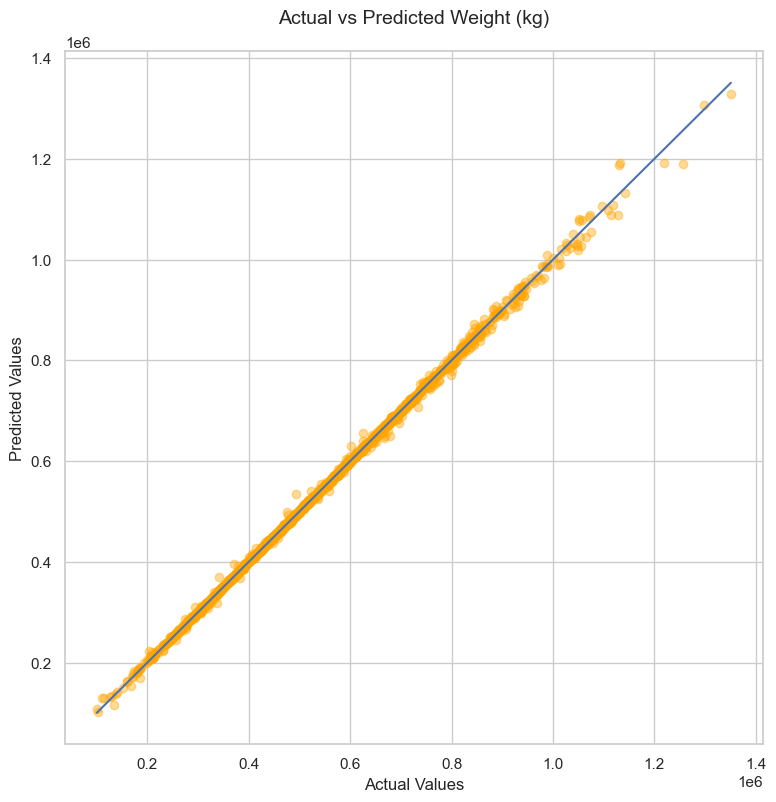

In [183]:
# Plotting actual vs predicted Scatter Plot

plt.figure(figsize=(9, 9))
plt.scatter(Y_test, y_predicted, alpha = 0.4, color = 'orange')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Weight (kg)', fontsize = 14, pad = 20.0)
plt.grid(True)
plt.show()

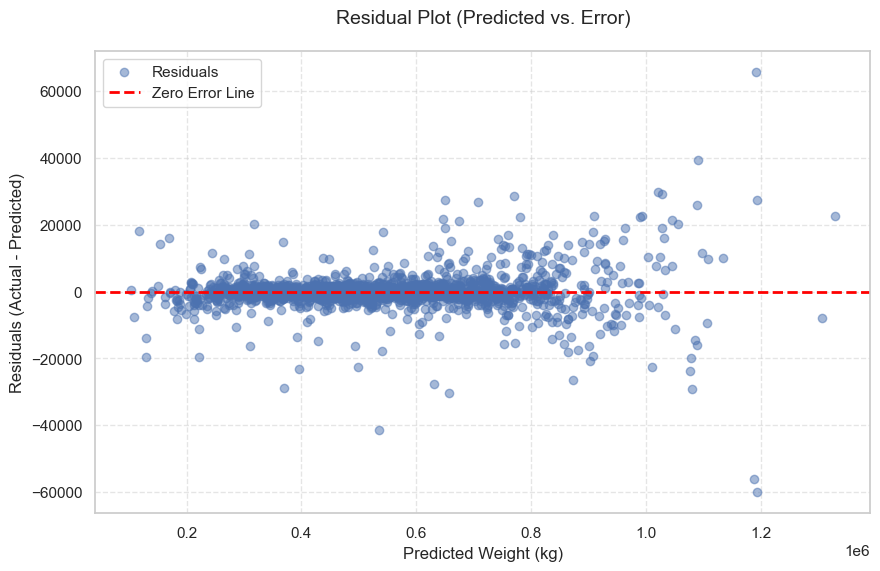

In [158]:
# Residual Plot

# Calculate residuals (error)
residuals = Y_test - y_predicted

plt.figure(figsize=(10, 6))

# Scatter of predicted vs residuals
plt.scatter(y_predicted, residuals, alpha=0.5, label='Residuals')

# Horizontal line at 0 error (ideal)
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')

# Titles and labels
plt.title('Residual Plot (Predicted vs. Error)', fontsize=14, pad = 20.0)
plt.xlabel('Predicted Weight (kg)', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)

# Grid + legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()


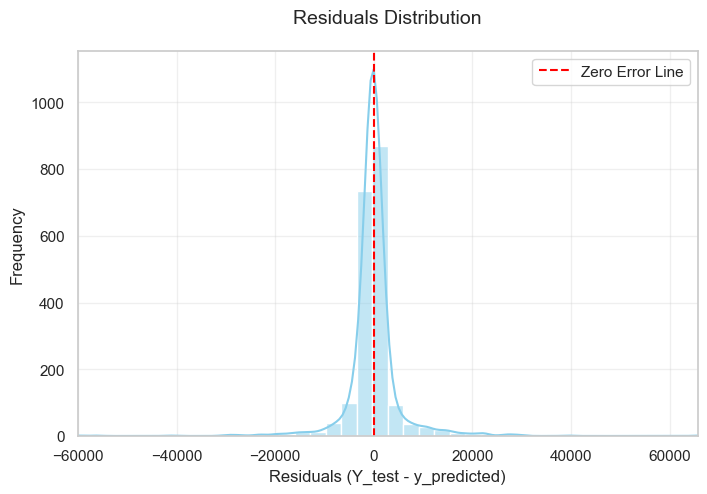

In [165]:
# Residual / Error distribution (histogram and KDE)

# Calculate residuals
residuals = Y_test - y_predicted

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='skyblue', bins = 40)
plt.axvline(0, color='red', linestyle='--', label='Zero Error Line')
# Expand x-axis to see spread clearly
plt.xlim(residuals.min() - 0.5, residuals.max() + 0.5)

plt.title('Residuals Distribution', fontsize = 14, pad = 20.0)
plt.xlabel('Residuals (Y_test - y_predicted)')
plt.ylabel('Frequency')


plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


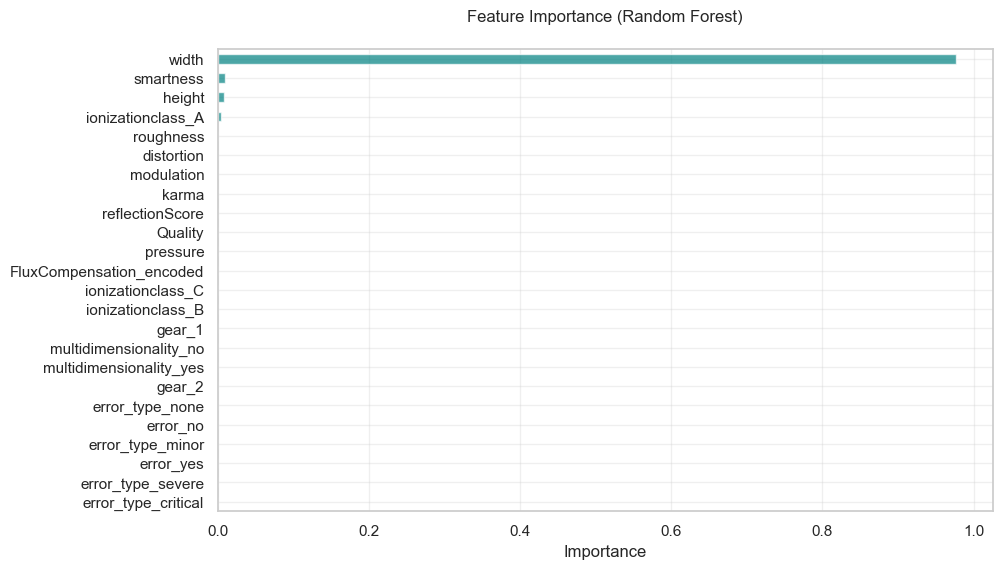

In [167]:
# Feature Importance Bar Plot (Random Forest)

# Convert to Series with feature names
feature_importances = pd.Series(rf_regressor.feature_importances_, index = X_test.columns)

# Sort ascending or descending
feature_importances = feature_importances.sort_values(ascending=True)  # True = smallest on bottom

# Plot
plt.figure(figsize=(10,6))
feature_importances.plot(kind='barh', color='teal', alpha=0.7)
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)', pad = 20.0)
plt.grid(alpha=0.3)
plt.show()


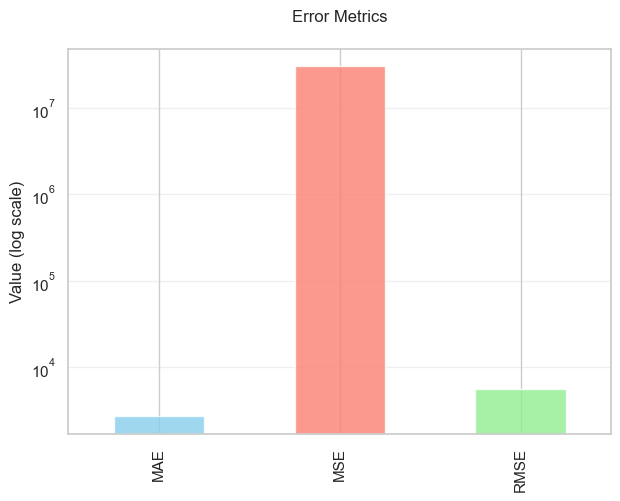

In [172]:
#  bar plots for MAE, MSE, RMSE

#  metrics
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
}

# Plot
pd.Series(metrics).plot(kind='bar', figsize=(7,5), color=['skyblue','salmon','lightgreen'], alpha=0.8, logy = True)

plt.ylabel('Value (log scale)')
plt.title('Error Metrics', pad = 20.0)
plt.grid(axis='y', alpha=0.3)
plt.show()


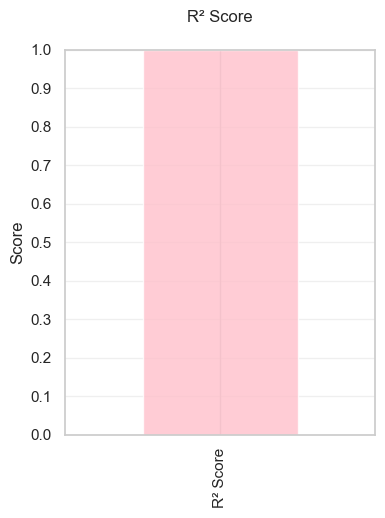

In [185]:
#  R-Squared Score 

# Plot
pd.Series({'R² Score': r2}).plot(kind='bar', figsize=(4,5), color='pink', alpha = 0.8)

plt.ylim(0,1)
plt.yticks(np.arange(0, 1.05, 0.1))  # ticks every 0.1 unit

plt.title('R² Score', pad = 20.0)
plt.ylabel('Score')

plt.grid(axis='y', alpha=0.3)
plt.show()


<hr>

<hr>

<hr>